# Analyse des données d'un cabinet dentaire 🦷
Optimisation des soins, des paiements et de la fidélisation des patients

## Sommaire
1. Introduction
2. Objectifs métier 🎯
3. Importation des bibliothèques et des données 📥
4. Exploration initiale des données 🔍
5. Nettoyage et préparation des données 🧹
6. Analyse univariée 📊
7. Analyse bivariée 🔗
8. Visualisations interactives (Plotly) 🧠
9. Conclusions et recommandations ✅
10. Annexes (KPIs, fonctions, etc.) 📎

## 1. Introduction

Ce projet vise à explorer et analyser les données d'un cabinet dentaire fictif.  
Les objectifs sont d'identifier les pratiques rentables, de comprendre le comportement des patients,  
et de détecter les retards de paiement ou opportunités d'amélioration opérationnelle.

Les données incluent des informations sur les patients, les soins prodigués, les paiements,  
et le profil financier des patients. Ce projet ne contient aucune donnée personnelle réelle.

## 2. Objectifs métier 🎯

Voici les questions auxquelles nous souhaitons répondre :

- 🦷 Quels sont les soins les plus fréquents et les plus rentables ?
- 💳 Quelle est la répartition des patients selon leur profil financier ?
- ⏰ Quelle part des patients règle ses soins en retard ?
- 💼 Quels praticiens génèrent le plus de chiffre d'affaires ?
- 🏥 Existe-t-il des différences selon les cliniques ou cantons ?
- 👑 Quelle est la proportion de clients VIP (ayant dépensé plus de 20'000 CHF) ?
  - 🏢 par clinique
  - 🗺️ par canton
  - 🏘️ par ville (commune)


## 3. Importation des bibliothèques et des données 📥

Nous allons charger les données du cabinet dentaire et effectuer une première exploration :  
- Aperçu des colonnes
- Types de données
- Valeurs manquantes
- Quelques statistiques descriptives

In [392]:
# 📦 Importation des bibiothèques standards
import pandas as pd
import numpy as np

# 🧼 Bibliothèques pour les données manquantes
import missingno as msno

# 📊 Visualisation statique
import matplotlib.pyplot as plt
import seaborn as sns

# 📈 Visualisation interactive
import plotly.express as px

In [393]:
df=pd.read_excel("patients_mis_a_jour.xlsx")
print(df.shape) # Nous avons un dataset de 10'200 lignes et de 36 colonnes

(10200, 34)


In [394]:
df.dtypes.value_counts() # Sur 36 colonnes , 25 colonnes représentent des chaînes de caractères, 10 des valeurs numériques et 1 colonne de date

object            21
float64            7
int64              3
datetime64[ns]     2
bool               1
Name: count, dtype: int64

## 4. Nettoyage et préparation des données

Avant de commencer l’analyse, il est essentiel de s’assurer que les données sont propres, cohérentes et exploitables.

### Étapes à réaliser :

- 🚫 **Suppression des lignes sans type de soin** : ces lignes n'étaient pas exploitables car le type de soin est indispensable à l’analyse.
- 🧼 **Uniformisation des chaînes de caractères** : nettoyage des noms de villes, cliniques, etc., pour éviter les doublons involontaires.
- 🏷️ **Conversion des dates** : la colonne `Date du soin` a été convertie au format datetime, ce qui permet d’en extraire l’année et le mois.
- 📅 **Ajout de colonnes dérivées** : `année` et `mois` ont été ajoutées pour faciliter les analyses temporelles.
- ✅ **Vérification des valeurs manquantes** :
    - Aucune valeur manquante détectée sur les colonnes essentielles, sauf pour `formule`.
    - Les valeurs manquantes de la colonne `formule` ont été remplacées par `"Aucune"` car il est possible d’être soigné sans formule.

In [395]:
df.isnull().sum().sort_values(ascending=False)

satisfaction_1-5           581
retard                      68
retard_paiement_jours       68
date_paiement               68
type_de_soin_normalisé       0
méthode_de_paiement          0
nb_visites_patient           0
patient_fidèle               0
type_de_patient              0
canton_clinique              0
formule                      0
nom                          0
nom_de_la_clinique           0
nom_complet_praticien        0
rdv_manqué                   0
adresse_complete             0
revenu_horaire_chf/h         0
patientid                    0
reste_à_charge_chf           0
montant_payé_chf             0
montant_total_chf            0
cabinet                      0
type_de_praticien            0
dentiste                     0
catégorie_soin               0
type_de_soin                 0
durée_minutes                0
heure_début                  0
date_du_soin                 0
assurance                    0
âge                          0
sexe                         0
prénom  

In [396]:
# Détection des chaînes vides dans tout le dataframe
(df== "").sum().sort_values(ascending=False)

patientid                  0
formule                    0
méthode_de_paiement        0
satisfaction_1-5           0
nb_visites_patient         0
patient_fidèle             0
type_de_patient            0
type_de_soin_normalisé     0
canton_clinique            0
nom                        0
nom_de_la_clinique         0
nom_complet_praticien      0
rdv_manqué                 0
adresse_complete           0
date_paiement              0
retard_paiement_jours      0
revenu_horaire_chf/h       0
taux_de_remboursement_%    0
reste_à_charge_chf         0
montant_payé_chf           0
montant_total_chf          0
cabinet                    0
type_de_praticien          0
dentiste                   0
catégorie_soin             0
type_de_soin               0
durée_minutes              0
heure_début                0
date_du_soin               0
assurance                  0
âge                        0
sexe                       0
prénom                     0
retard                     0
dtype: int64

In [397]:
df.columns

Index(['patientid', 'nom', 'prénom', 'sexe', 'âge', 'assurance',
       'date_du_soin', 'heure_début', 'durée_minutes', 'type_de_soin',
       'catégorie_soin', 'dentiste', 'type_de_praticien', 'cabinet',
       'montant_total_chf', 'montant_payé_chf', 'reste_à_charge_chf',
       'taux_de_remboursement_%', 'revenu_horaire_chf/h',
       'méthode_de_paiement', 'satisfaction_1-5', 'nb_visites_patient',
       'patient_fidèle', 'type_de_patient', 'type_de_soin_normalisé',
       'formule', 'canton_clinique', 'nom_de_la_clinique',
       'nom_complet_praticien', 'rdv_manqué', 'adresse_complete',
       'date_paiement', 'retard_paiement_jours', 'retard'],
      dtype='object')

In [398]:
df["adresse_complete"]

0           Rue de Lausanne 15, 1217 Carouge
1            Avenue de Vaudagne 1, 1800 Nyon
2             Rue de Lausanne 15, 1227 Vevey
3        Rue des Eaux-Vives 23, 1260 Carouge
4            Rue de Lausanne 15, 1217 Meyrin
                        ...                 
10195    Avenue de la Sallaz 8, 1004 Yverdon
10196     Avenue de la Sallaz 8, 1800 Meyrin
10197          Rue Centrale 12, 1260 Yverdon
10198       Avenue de la Sallaz 8, 1800 Nyon
10199     Avenue de la Sallaz 8, 1004 Genève
Name: adresse_complete, Length: 10200, dtype: object

In [399]:
df["satisfaction_1-5"]=df["satisfaction_1-5"].fillna(0)
df["formule"] = df["formule"].fillna("Aucune")

In [400]:
df["adresse_complete"]

0           Rue de Lausanne 15, 1217 Carouge
1            Avenue de Vaudagne 1, 1800 Nyon
2             Rue de Lausanne 15, 1227 Vevey
3        Rue des Eaux-Vives 23, 1260 Carouge
4            Rue de Lausanne 15, 1217 Meyrin
                        ...                 
10195    Avenue de la Sallaz 8, 1004 Yverdon
10196     Avenue de la Sallaz 8, 1800 Meyrin
10197          Rue Centrale 12, 1260 Yverdon
10198       Avenue de la Sallaz 8, 1800 Nyon
10199     Avenue de la Sallaz 8, 1004 Genève
Name: adresse_complete, Length: 10200, dtype: object

In [401]:
import re
import pandas as pd

# Fonction pour extraire code postal et ville
def extraire_codepostal_ville(adresse):
    match = re.search(r"(\d{4,5})\s+(.+)$", str(adresse))
    if match:
        return pd.Series({
            "code_postal": match.group(1),
            "ville": match.group(2).strip()
        })
    return pd.Series({
        "code_postal": None,
        "ville": None
    })

# Application sur la colonne "adresse_complete"
df[["code_postal", "ville"]] = df["adresse_complete"].apply(extraire_codepostal_ville)

# Aperçu
df.head()

,patientid,nom,prénom,sexe,âge,assurance,date_du_soin,heure_début,durée_minutes,type_de_soin,...,canton_clinique,nom_de_la_clinique,nom_complet_praticien,rdv_manqué,adresse_complete,date_paiement,retard_paiement_jours,retard,code_postal,ville
0,P02449,Carron,Patrick,Homme,18,Swica,2024-08-25,10:30,30,Carie,...,Genève,Cornavin,Dr Lagouge,False,"Rue de Lausanne 15, 1217 Carouge",2024-09-11,17.0,True,1217,Carouge
1,P01424,Robert,Gilbert,Homme,42,Aucune,2024-06-23,11:30,30,Contrôle annuel,...,Genève,Meyrin,Dr Akdag,False,"Avenue de Vaudagne 1, 1800 Nyon",2024-07-20,27.0,True,1800,Nyon
2,P02948,Jomini,Laurence,Femme,59,Swica,2025-03-25,12:45,20,Consultation devis,...,Genève,Cornavin,Jess,False,"Rue de Lausanne 15, 1227 Vevey",2024-10-07,10.0,True,1227,Vevey
3,P00720,Nusslé,Germaine,Femme,26,Helsana,2024-11-02,12:30,90,Chirurgie complexe,...,Genève,Eaux-Vives,Hussein Abra,False,"Rue des Eaux-Vives 23, 1260 Carouge",2025-02-22,9.0,True,1260,Carouge
4,P00828,Chenaux,Kevin,Homme,56,CSS,2024-09-27,17:30,30,Carie,...,Genève,Cornavin,Dr Bodart,False,"Rue de Lausanne 15, 1217 Meyrin",2025-06-09,9.0,True,1217,Meyrin


In [402]:
import re
# Fonction pour extraire uniquement l'adresse sans CP ni ville
def extraire_adresse(adresse_complete):
    match = re.search(r"^(.+),\s*\d{4,5}\s+.+$", str(adresse_complete))
    if match:
        return match.group(1).strip()
    return adresse_complete # en cas d'échec on garde la valeur originale

# Appliquer la fonction et remplacer la colonne "adresse"
df["adresse"] = df["adresse_complete"].apply(extraire_adresse)

In [403]:
df["code_postal"].value_counts().head()
df["ville"].value_counts().head()

# supprimer la colonne adresse_complete
df.drop(columns=["adresse_complete"], inplace=True)

In [404]:
df

,patientid,nom,prénom,sexe,âge,assurance,date_du_soin,heure_début,durée_minutes,type_de_soin,...,canton_clinique,nom_de_la_clinique,nom_complet_praticien,rdv_manqué,date_paiement,retard_paiement_jours,retard,code_postal,ville,adresse
0,P02449,Carron,Patrick,Homme,18,Swica,2024-08-25,10:30,30,Carie,...,Genève,Cornavin,Dr Lagouge,False,2024-09-11,17.0,True,1217,Carouge,Rue de Lausanne 15
1,P01424,Robert,Gilbert,Homme,42,Aucune,2024-06-23,11:30,30,Contrôle annuel,...,Genève,Meyrin,Dr Akdag,False,2024-07-20,27.0,True,1800,Nyon,Avenue de Vaudagne 1
2,P02948,Jomini,Laurence,Femme,59,Swica,2025-03-25,12:45,20,Consultation devis,...,Genève,Cornavin,Jess,False,2024-10-07,10.0,True,1227,Vevey,Rue de Lausanne 15
3,P00720,Nusslé,Germaine,Femme,26,Helsana,2024-11-02,12:30,90,Chirurgie complexe,...,Genève,Eaux-Vives,Hussein Abra,False,2025-02-22,9.0,True,1260,Carouge,Rue des Eaux-Vives 23
4,P00828,Chenaux,Kevin,Homme,56,CSS,2024-09-27,17:30,30,Carie,...,Genève,Cornavin,Dr Bodart,False,2025-06-09,9.0,True,1217,Meyrin,Rue de Lausanne 15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,P106115,Corbat,Laurence,Femme,23,Aucune,2024-12-16,16:15,50,Formule Complète,...,Vaud,Sallaz,Dre Catrin Dumont Jones,False,2025-04-12,25.0,True,1004,Yverdon,Avenue de la Sallaz 8
10196,P106116,Comment,Lucas,Homme,50,CSS,2025-04-02,17:00,50,Formule Complète,...,Vaud,Sallaz,Dre Olivia Sozanska,False,2025-05-26,18.0,True,1800,Meyrin,Avenue de la Sallaz 8
10197,P106117,Bouvier,Sara,Femme,65,Assura,2025-01-02,14:30,50,Formule Complète,...,Vaud,Bessières,Bianca Rus,False,2025-05-23,26.0,True,1260,Yverdon,Rue Centrale 12
10198,P106118,Chaudet,Michael,Homme,42,CSS,2025-02-09,15:00,40,Formule Clean,...,Vaud,Sallaz,Bérénice Louis,False,2025-02-13,29.0,True,1800,Nyon,Avenue de la Sallaz 8


In [405]:
# 🧮Étape 1 : Calculer l’index où placer la colonne

# Nom de la colonne à déplacer
col_to_move = "adresse"

# Position cible : 5ème depuis la fin = total colonne -3
target_position = len(df.columns) - 3
target_position

# 🚚 Étape 2 : Réorganiser les colonnes

# Liste des colonnes sans celle qu'on veut déplacer
cols = df.columns.tolist()
cols.remove(col_to_move)

# Insertion à la position cible
cols.insert(target_position, col_to_move)

# Réorganiser le DataFrame
df = df[cols]
df

,patientid,nom,prénom,sexe,âge,assurance,date_du_soin,heure_début,durée_minutes,type_de_soin,...,canton_clinique,nom_de_la_clinique,nom_complet_praticien,rdv_manqué,date_paiement,retard_paiement_jours,retard,adresse,code_postal,ville
0,P02449,Carron,Patrick,Homme,18,Swica,2024-08-25,10:30,30,Carie,...,Genève,Cornavin,Dr Lagouge,False,2024-09-11,17.0,True,Rue de Lausanne 15,1217,Carouge
1,P01424,Robert,Gilbert,Homme,42,Aucune,2024-06-23,11:30,30,Contrôle annuel,...,Genève,Meyrin,Dr Akdag,False,2024-07-20,27.0,True,Avenue de Vaudagne 1,1800,Nyon
2,P02948,Jomini,Laurence,Femme,59,Swica,2025-03-25,12:45,20,Consultation devis,...,Genève,Cornavin,Jess,False,2024-10-07,10.0,True,Rue de Lausanne 15,1227,Vevey
3,P00720,Nusslé,Germaine,Femme,26,Helsana,2024-11-02,12:30,90,Chirurgie complexe,...,Genève,Eaux-Vives,Hussein Abra,False,2025-02-22,9.0,True,Rue des Eaux-Vives 23,1260,Carouge
4,P00828,Chenaux,Kevin,Homme,56,CSS,2024-09-27,17:30,30,Carie,...,Genève,Cornavin,Dr Bodart,False,2025-06-09,9.0,True,Rue de Lausanne 15,1217,Meyrin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,P106115,Corbat,Laurence,Femme,23,Aucune,2024-12-16,16:15,50,Formule Complète,...,Vaud,Sallaz,Dre Catrin Dumont Jones,False,2025-04-12,25.0,True,Avenue de la Sallaz 8,1004,Yverdon
10196,P106116,Comment,Lucas,Homme,50,CSS,2025-04-02,17:00,50,Formule Complète,...,Vaud,Sallaz,Dre Olivia Sozanska,False,2025-05-26,18.0,True,Avenue de la Sallaz 8,1800,Meyrin
10197,P106117,Bouvier,Sara,Femme,65,Assura,2025-01-02,14:30,50,Formule Complète,...,Vaud,Bessières,Bianca Rus,False,2025-05-23,26.0,True,Rue Centrale 12,1260,Yverdon
10198,P106118,Chaudet,Michael,Homme,42,CSS,2025-02-09,15:00,40,Formule Clean,...,Vaud,Sallaz,Bérénice Louis,False,2025-02-13,29.0,True,Avenue de la Sallaz 8,1800,Nyon


In [406]:
# mettre une majuscule à la première lettre de chaque non de colonne
df.columns = [col.capitalize() for col in df.columns]

# Supprimer les espaces au début / à la fin
df.columns = [col.strip() for col in df.columns]

# Remplacer les underscores par des espaces
df.columns = [col.replace("_", " ") for col in df.columns]

# Mettre chaque mot en majuscule 
df.columns = [col.replace("_", " ").title() for col in df.columns]

# Renommer certaines colonnes 
df.rename(columns={
    "patientidid":"ID patientid",
    "Montant Payé Chf" : "montant_total_chf",
    "date_du_soin Du Soin": "date_du_soin",
    'Reste À Charge Chf': "Somme Non Remboursée (CHF)",
    "date_du_soin Du Soin": "date_du_soin"
}, inplace=True)
df

,Patientid,Nom,Prénom,Sexe,Âge,Assurance,Date Du Soin,Heure Début,Durée Minutes,Type De Soin,...,Canton Clinique,Nom De La Clinique,Nom Complet Praticien,Rdv Manqué,Date Paiement,Retard Paiement Jours,Retard,Adresse,Code Postal,Ville
0,P02449,Carron,Patrick,Homme,18,Swica,2024-08-25,10:30,30,Carie,...,Genève,Cornavin,Dr Lagouge,False,2024-09-11,17.0,True,Rue de Lausanne 15,1217,Carouge
1,P01424,Robert,Gilbert,Homme,42,Aucune,2024-06-23,11:30,30,Contrôle annuel,...,Genève,Meyrin,Dr Akdag,False,2024-07-20,27.0,True,Avenue de Vaudagne 1,1800,Nyon
2,P02948,Jomini,Laurence,Femme,59,Swica,2025-03-25,12:45,20,Consultation devis,...,Genève,Cornavin,Jess,False,2024-10-07,10.0,True,Rue de Lausanne 15,1227,Vevey
3,P00720,Nusslé,Germaine,Femme,26,Helsana,2024-11-02,12:30,90,Chirurgie complexe,...,Genève,Eaux-Vives,Hussein Abra,False,2025-02-22,9.0,True,Rue des Eaux-Vives 23,1260,Carouge
4,P00828,Chenaux,Kevin,Homme,56,CSS,2024-09-27,17:30,30,Carie,...,Genève,Cornavin,Dr Bodart,False,2025-06-09,9.0,True,Rue de Lausanne 15,1217,Meyrin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,P106115,Corbat,Laurence,Femme,23,Aucune,2024-12-16,16:15,50,Formule Complète,...,Vaud,Sallaz,Dre Catrin Dumont Jones,False,2025-04-12,25.0,True,Avenue de la Sallaz 8,1004,Yverdon
10196,P106116,Comment,Lucas,Homme,50,CSS,2025-04-02,17:00,50,Formule Complète,...,Vaud,Sallaz,Dre Olivia Sozanska,False,2025-05-26,18.0,True,Avenue de la Sallaz 8,1800,Meyrin
10197,P106117,Bouvier,Sara,Femme,65,Assura,2025-01-02,14:30,50,Formule Complète,...,Vaud,Bessières,Bianca Rus,False,2025-05-23,26.0,True,Rue Centrale 12,1260,Yverdon
10198,P106118,Chaudet,Michael,Homme,42,CSS,2025-02-09,15:00,40,Formule Clean,...,Vaud,Sallaz,Bérénice Louis,False,2025-02-13,29.0,True,Avenue de la Sallaz 8,1800,Nyon


### Préparation temporelle 

Pour faciliter les analyses par période, nous extrayons les informations de date :
- "Annee" : pour les regroupements annuels
- "Mois" : pour détecter d'éventuelles variations saisonnières
- "Annee-Mois" : pour les agrégations mensuelles (ex : "2024-06")

In [407]:
# Vérifier que la colonne date est bien en format datetime
df["Date Du Soin"] = pd.to_datetime(df["Date Du Soin"], errors = "coerce")

# Créer les colonnes Annee et mois
df["Annee"] = df["Date Du Soin"].dt.year
df["mois"] = df["Date Du Soin"].dt.month
df["Annee-mois"] = df["Date Du Soin"].dt.to_period("M").astype(str)
df

,Patientid,Nom,Prénom,Sexe,Âge,Assurance,Date Du Soin,Heure Début,Durée Minutes,Type De Soin,...,Rdv Manqué,Date Paiement,Retard Paiement Jours,Retard,Adresse,Code Postal,Ville,Annee,mois,Annee-mois
0,P02449,Carron,Patrick,Homme,18,Swica,2024-08-25,10:30,30,Carie,...,False,2024-09-11,17.0,True,Rue de Lausanne 15,1217,Carouge,2024,8,2024-08
1,P01424,Robert,Gilbert,Homme,42,Aucune,2024-06-23,11:30,30,Contrôle annuel,...,False,2024-07-20,27.0,True,Avenue de Vaudagne 1,1800,Nyon,2024,6,2024-06
2,P02948,Jomini,Laurence,Femme,59,Swica,2025-03-25,12:45,20,Consultation devis,...,False,2024-10-07,10.0,True,Rue de Lausanne 15,1227,Vevey,2025,3,2025-03
3,P00720,Nusslé,Germaine,Femme,26,Helsana,2024-11-02,12:30,90,Chirurgie complexe,...,False,2025-02-22,9.0,True,Rue des Eaux-Vives 23,1260,Carouge,2024,11,2024-11
4,P00828,Chenaux,Kevin,Homme,56,CSS,2024-09-27,17:30,30,Carie,...,False,2025-06-09,9.0,True,Rue de Lausanne 15,1217,Meyrin,2024,9,2024-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,P106115,Corbat,Laurence,Femme,23,Aucune,2024-12-16,16:15,50,Formule Complète,...,False,2025-04-12,25.0,True,Avenue de la Sallaz 8,1004,Yverdon,2024,12,2024-12
10196,P106116,Comment,Lucas,Homme,50,CSS,2025-04-02,17:00,50,Formule Complète,...,False,2025-05-26,18.0,True,Avenue de la Sallaz 8,1800,Meyrin,2025,4,2025-04
10197,P106117,Bouvier,Sara,Femme,65,Assura,2025-01-02,14:30,50,Formule Complète,...,False,2025-05-23,26.0,True,Rue Centrale 12,1260,Yverdon,2025,1,2025-01
10198,P106118,Chaudet,Michael,Homme,42,CSS,2025-02-09,15:00,40,Formule Clean,...,False,2025-02-13,29.0,True,Avenue de la Sallaz 8,1800,Nyon,2025,2,2025-02


📌 Les colonnes `Date`, `Année`, `Mois` et `Année-Mois` sont toutes conservées,
car elles permettent des regroupements temporels à différents niveaux de granularité.
Cela facilite l'analyse par année, par mois ou sur une base chronologique continue.

## 5. Analyse exploratoire - Partie 1 : Soins

Cette première partie de l'EDA vise à analyser les types de soins réalisés : 
- Leur fréquence
- Leur revenus qu'ils génèrent
- Leur rentabilité moyenne

Cela permet d'identifier les soins clés pour l'activité économique du cabinet.

### 1.  Soins les plus fréquents (barre horizontale)

In [408]:
freq_soins = df["Type De Soin Normalisé"].value_counts().reset_index()
freq_soins.columns = ["Type De Soin Normalisé", "Nombre De Soins"]

fig = px.bar(freq_soins,
             x="Nombre De Soins",
             y="Type De Soin Normalisé",
             orientation="h",
             title="Soins les plus fréquents",
             color="Nombre De Soins",
             color_continuous_scale="Blues")

fig.update_layout(yaxis={"categoryorder":"total ascending"})
fig.show()


In [409]:
df.columns

Index(['Patientid', 'Nom', 'Prénom', 'Sexe', 'Âge', 'Assurance',
       'Date Du Soin', 'Heure Début', 'Durée Minutes', 'Type De Soin',
       'Catégorie Soin', 'Dentiste', 'Type De Praticien', 'Cabinet',
       'Montant Total Chf', 'montant_total_chf', 'Somme Non Remboursée (CHF)',
       'Taux De Remboursement %', 'Revenu Horaire Chf/H',
       'Méthode De Paiement', 'Satisfaction 1-5', 'Nb Visites Patient',
       'Patient Fidèle', 'Type De Patient', 'Type De Soin Normalisé',
       'Formule', 'Canton Clinique', 'Nom De La Clinique',
       'Nom Complet Praticien', 'Rdv Manqué', 'Date Paiement',
       'Retard Paiement Jours', 'Retard', 'Adresse', 'Code Postal', 'Ville',
       'Annee', 'mois', 'Annee-mois'],
      dtype='object')

### 2. Revenus totaux par type de soin

In [410]:
revenus_par_soin = df.groupby("Type De Soin")["Montant Total Chf"].sum().reset_index()
revenus_par_soin.columns = ["Type De Soin", "Revenu Total"] # je renomme les deux colonnes

fig = px.bar(revenus_par_soin.sort_values("Revenu Total"),
             x="Revenu Total",
             y="Type De Soin",
             orientation = "h",
             title = "Revenu total par type de soin",
             color="Revenu Total",
             color_continuous_scale="Greens")

fig.update_layout(yaxis = {"categoryorder": "total ascending"})
fig.show()

### 3. Revenu moyen par type de soin

In [411]:
df.columns

Index(['Patientid', 'Nom', 'Prénom', 'Sexe', 'Âge', 'Assurance',
       'Date Du Soin', 'Heure Début', 'Durée Minutes', 'Type De Soin',
       'Catégorie Soin', 'Dentiste', 'Type De Praticien', 'Cabinet',
       'Montant Total Chf', 'montant_total_chf', 'Somme Non Remboursée (CHF)',
       'Taux De Remboursement %', 'Revenu Horaire Chf/H',
       'Méthode De Paiement', 'Satisfaction 1-5', 'Nb Visites Patient',
       'Patient Fidèle', 'Type De Patient', 'Type De Soin Normalisé',
       'Formule', 'Canton Clinique', 'Nom De La Clinique',
       'Nom Complet Praticien', 'Rdv Manqué', 'Date Paiement',
       'Retard Paiement Jours', 'Retard', 'Adresse', 'Code Postal', 'Ville',
       'Annee', 'mois', 'Annee-mois'],
      dtype='object')

In [412]:
revenu_moyen = df.groupby("Type De Soin")["montant_total_chf"].mean().reset_index()
revenu_moyen.columns = ["Type De Soin", "Revenu Moyen (CHF)"]

fig = px.bar(revenu_moyen.sort_values("Revenu Moyen (CHF)"),
             x="Revenu Moyen (CHF)",
             y="Type De Soin",
             orientation="h",
             title="Revenu Moyen par soin",
             color="Revenu Moyen (CHF)",
             color_continuous_scale="Oranges")

fig.update_layout(yaxis={"categoryorder":"total ascending"})
fig.show()

## 6. Analyse exploratoire - Partie 2 : Profils des patients

### 1. Répartition des patients par sexe

In [413]:
sexe_counts = df["Sexe"].value_counts().reset_index()
sexe_counts.columns = ["Sexe", "Nombre"]

fig = px.pie(sexe_counts,
             names="Sexe",
             values="Nombre",
             title="Répartition des patients par sexe",
             color_discrete_sequence = px.colors.qualitative.Set2)

fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()

### 2. Répartition des patients par tranche d'âge

In [414]:
def categoriser_age(age):
    if age <18:
        return "0-17"
    elif age < 30:
        return "18-29"
    elif age < 45:
        return "30-44"
    elif age < 60:
        return "45-59"
    elif age < 75:
        return "60-74"
    else:
        return "75+"
    
df["Tranche Age"] = df["Âge"].apply(categoriser_age)

In [415]:
age_counts = df["Tranche Age"].value_counts().sort_index().reset_index()
age_counts.columns = ["Tranche Age", "Nombre"]

fig = px.bar(age_counts,
             x="Tranche Age",
             y="Nombre",
             title="Répartition des patients par tranche d'âge",
             color="Nombre",
             color_continuous_scale="Viridis")

fig.show()

### Répartition par type de patient (financier)

In [416]:
df["Type De Soin Normalisé"]

0                     carie
1           contrôle annuel
2        consultation devis
3        chirurgie complexe
4                     carie
                ...        
10195               urgence
10196                 carie
10197               urgence
10198               urgence
10199                 carie
Name: Type De Soin Normalisé, Length: 10200, dtype: object

In [417]:
df.columns

Index(['Patientid', 'Nom', 'Prénom', 'Sexe', 'Âge', 'Assurance',
       'Date Du Soin', 'Heure Début', 'Durée Minutes', 'Type De Soin',
       'Catégorie Soin', 'Dentiste', 'Type De Praticien', 'Cabinet',
       'Montant Total Chf', 'montant_total_chf', 'Somme Non Remboursée (CHF)',
       'Taux De Remboursement %', 'Revenu Horaire Chf/H',
       'Méthode De Paiement', 'Satisfaction 1-5', 'Nb Visites Patient',
       'Patient Fidèle', 'Type De Patient', 'Type De Soin Normalisé',
       'Formule', 'Canton Clinique', 'Nom De La Clinique',
       'Nom Complet Praticien', 'Rdv Manqué', 'Date Paiement',
       'Retard Paiement Jours', 'Retard', 'Adresse', 'Code Postal', 'Ville',
       'Annee', 'mois', 'Annee-mois', 'Tranche Age'],
      dtype='object')

In [418]:
df.columns

Index(['Patientid', 'Nom', 'Prénom', 'Sexe', 'Âge', 'Assurance',
       'Date Du Soin', 'Heure Début', 'Durée Minutes', 'Type De Soin',
       'Catégorie Soin', 'Dentiste', 'Type De Praticien', 'Cabinet',
       'Montant Total Chf', 'montant_total_chf', 'Somme Non Remboursée (CHF)',
       'Taux De Remboursement %', 'Revenu Horaire Chf/H',
       'Méthode De Paiement', 'Satisfaction 1-5', 'Nb Visites Patient',
       'Patient Fidèle', 'Type De Patient', 'Type De Soin Normalisé',
       'Formule', 'Canton Clinique', 'Nom De La Clinique',
       'Nom Complet Praticien', 'Rdv Manqué', 'Date Paiement',
       'Retard Paiement Jours', 'Retard', 'Adresse', 'Code Postal', 'Ville',
       'Annee', 'mois', 'Annee-mois', 'Tranche Age'],
      dtype='object')

In [419]:
df["Type De Patient"]

0             Fidèle
1             Fidèle
2             Fidèle
3        Occasionnel
4             Fidèle
            ...     
10195        Nouveau
10196        Nouveau
10197        Nouveau
10198        Nouveau
10199        Nouveau
Name: Type De Patient, Length: 10200, dtype: object

In [420]:
type_counts = df["Type De Patient"].value_counts().reset_index()
type_counts.columns = ["Type De Patient", "Nombre"]

fig = px.pie(type_counts,
             names="Type De Patient",
             values="Nombre",
             title="Répartition des patients selon leur profil financier",
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()

In [421]:
import plotly.express as px
import plotly.graph_objects as go

# 1. Histogramme de la distribution d'âge des patients
fig = px.histogram(df, x="Âge", nbins=20, 
                   title="Distribution de l'âge des patients", 
                   color_discrete_sequence=["#636EFA"])
fig.update_layout(
    xaxis_title="Âge", 
    yaxis_title="Nombre de patients",
    showlegend=False
)
fig.show()

# 2. Boxplot du montant payé par tranche d'âge
fig = px.box(df, x="Tranche Age", y="montant_total_chf", 
             title="Montant payé par tranche d'âge", 
             color="Tranche Age", 
             color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(
    xaxis_title="Tranche d'âge", 
    yaxis_title="montant_total_chf",
    showlegend=False  # Évite la redondance avec l'axe x
)
fig.show()

# 3. Heatmap des soins par mois et année
# Vérification que 'pivot' existe et correction de la heatmap
if 'pivot' in locals() or 'pivot' in globals():
    fig = px.imshow(pivot.values, 
                    x=pivot.columns, 
                    y=pivot.index,
                    color_continuous_scale="Blues",
                    title="Nombre de soins par mois et année",
                    labels={"x": "mois", "y": "année", "color": "Nombre de soins"},
                    text_auto=True,
                    aspect="auto")
    fig.update_layout(
        xaxis_title="mois", 
        yaxis_title="année"
    )
    fig.show()
else:
    print("Attention: La variable 'pivot' n'est pas définie. Vous devez créer le tableau pivot avant d'utiliser cette visualisation.")
    # Exemple de création d'un tableau pivot si vous avez les colonnes appropriées :
    # pivot = df.pivot_table(values='nombre_soins', index='année', columns='mois', aggfunc='sum', fill_value=0)

Attention: La variable 'pivot' n'est pas définie. Vous devez créer le tableau pivot avant d'utiliser cette visualisation.


## 🦷 1. Performance des soins

### KPIs à analyser :
- **Top 10 soins par chiffre d'affaires**
- **Rentabilité moyenne par soin** = CA / nombre d'actes
- **Durée moyenne d'un soin** (si dispo) → rentabilité par minute
- **Nombre moyen de soins par patient**

### Analyses :
- Comparaison entre soins préventifs vs curatifs
- Évolution du nombre de soins par type dans le temps


Top 10 soins par chiffre d'affaires :
Type De Soin Normalisé
implant                1830808.78
pose appareil           761774.23
contrôle annuel         722770.83
chirurgie complexe      683967.57
carie                   577953.24
détartrage              355010.67
blanchiment             223120.00
extraction              145787.34
couronne                118330.00
suivi orthodontique     117777.14
Name: Montant Total Chf, dtype: float64


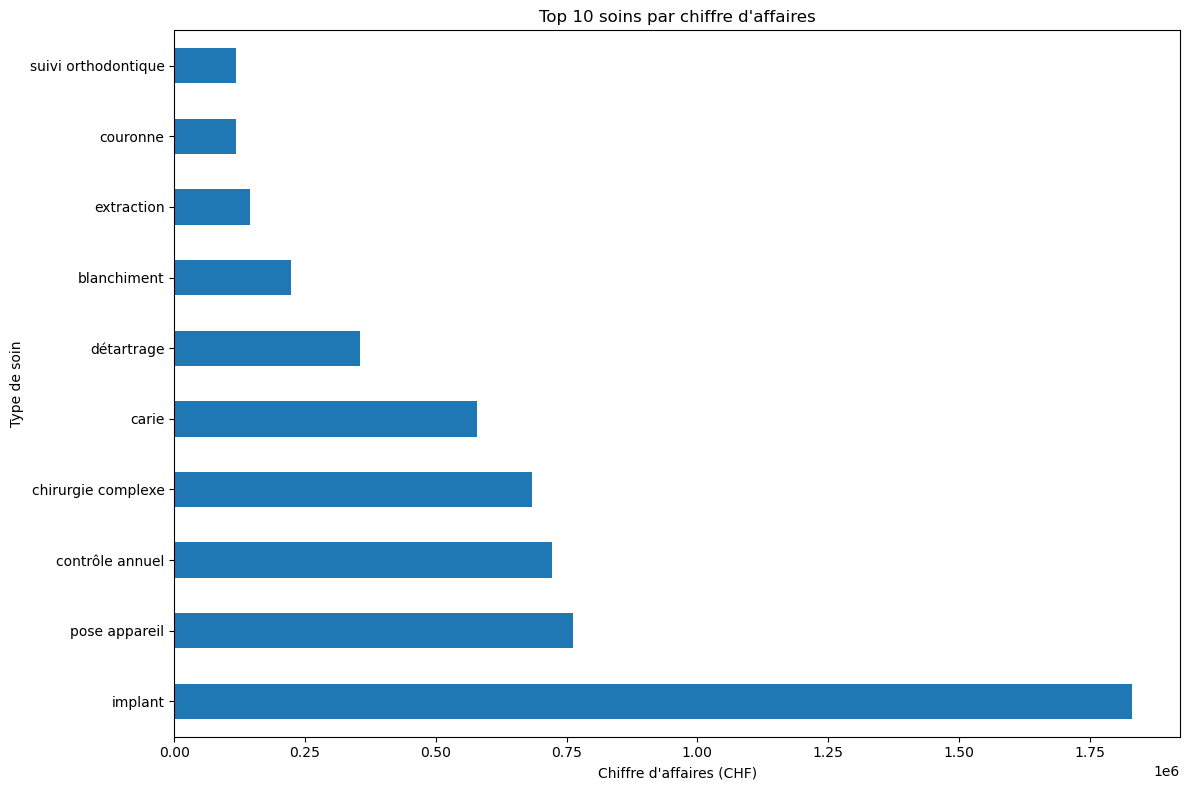

In [422]:
# 🦷 1.1 Top 10 soins par chiffre d'affaires
top_10_ca_soins = df.groupby('Type De Soin Normalisé')['Montant Total Chf'].sum().sort_values(ascending=False).head(10)
print('Top 10 soins par chiffre d\'affaires :')
print(top_10_ca_soins)

# Visualisation
plt.figure(figsize=(12, 8))
top_10_ca_soins.plot(kind='barh')
plt.title('Top 10 soins par chiffre d\'affaires')
plt.xlabel('Chiffre d\'affaires (CHF)')
plt.ylabel('Type de soin')
plt.tight_layout()
plt.show()

Rentabilité moyenne par soin :
                        montant_total_chf  Nombre_actes  Rentabilite_moyenne
Type De Soin Normalisé                                                      
pose appareil                   567963.87           333          1705.597207
implant                        1382219.87           825          1675.418024
chirurgie complexe              517951.00           346          1496.968208
couronne                         90530.24           309           292.978123
urgence                          82141.82           316           259.942468
blanchiment                     166881.63           644           259.132966
consultation                     83324.00           324           257.172840
suivi orthodontique              85665.37           338           253.447840
carie                           433656.61          1750           247.803777
contrôle annuel                 540858.06          2332           231.928842


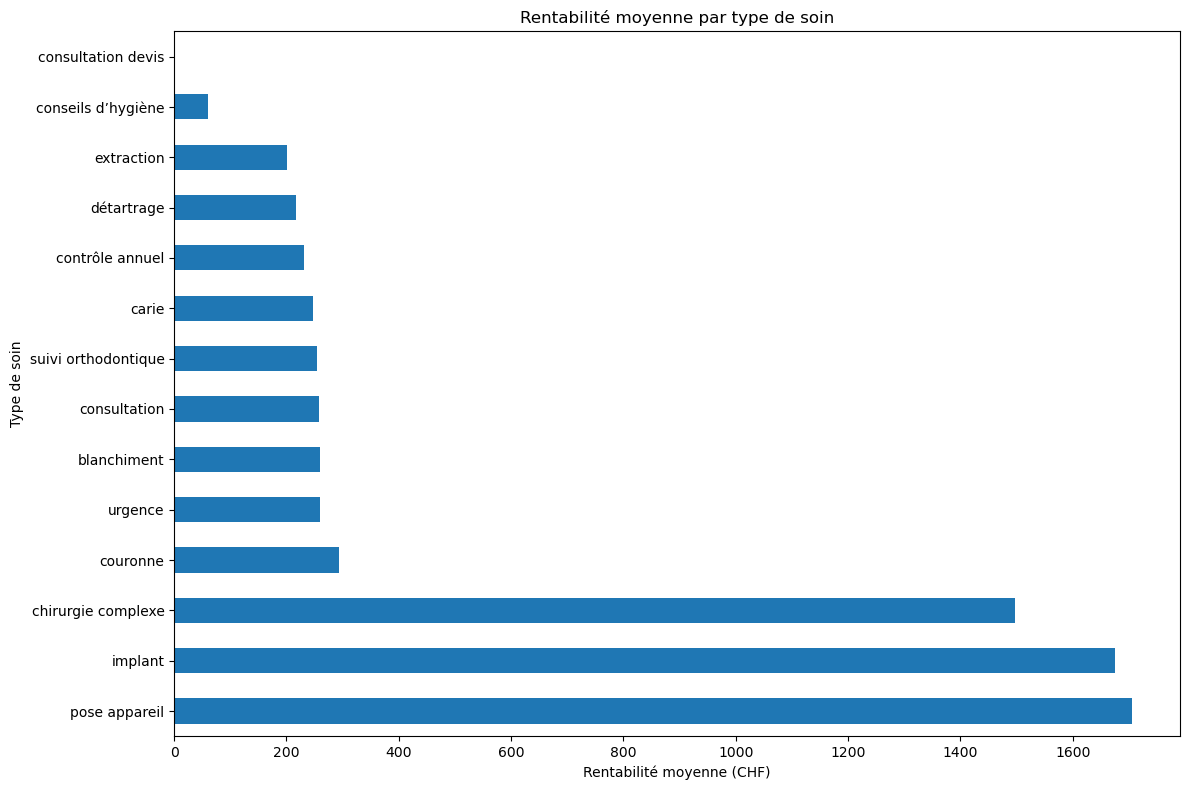

In [423]:
# 🦷 1.2 Rentabilité moyenne par soin
rentabilite_soins = df.groupby('Type De Soin Normalisé').agg({
    'montant_total_chf': 'sum',
    'Type De Soin Normalisé': 'count'
}).rename(columns={'Type De Soin Normalisé': 'Nombre_actes'})
rentabilite_soins['Rentabilite_moyenne'] = rentabilite_soins['montant_total_chf'] / rentabilite_soins['Nombre_actes']
rentabilite_soins = rentabilite_soins.sort_values('Rentabilite_moyenne', ascending=False)

print('Rentabilité moyenne par soin :')
print(rentabilite_soins.head(10))

# Visualisation
plt.figure(figsize=(12, 8))
rentabilite_soins.head(15)['Rentabilite_moyenne'].plot(kind='barh')
plt.title('Rentabilité moyenne par type de soin')
plt.xlabel('Rentabilité moyenne (CHF)')
plt.ylabel('Type de soin')
plt.tight_layout()
plt.show()

Nombre moyen de soins par patient : 1.23
Nombre médian de soins par patient : 1.00


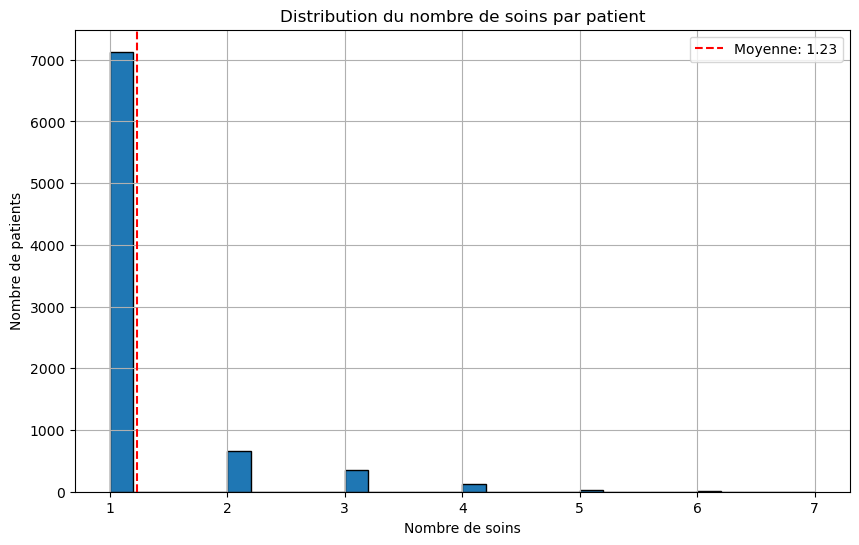

In [424]:
# 🦷 1.3 Nombre moyen de soins par patient
soins_par_patient = df.groupby('Patientid')['Type De Soin Normalisé'].count()
moyenne_soins_patient = soins_par_patient.mean()
median_soins_patient = soins_par_patient.median()

print(f'Nombre moyen de soins par patient : {moyenne_soins_patient:.2f}')
print(f'Nombre médian de soins par patient : {median_soins_patient:.2f}')

# Distribution du nombre de soins par patient
plt.figure(figsize=(10, 6))
soins_par_patient.hist(bins=30, edgecolor='black')
plt.title('Distribution du nombre de soins par patient')
plt.xlabel('Nombre de soins')
plt.ylabel('Nombre de patients')
plt.axvline(moyenne_soins_patient, color='red', linestyle='--', label=f'Moyenne: {moyenne_soins_patient:.2f}')
plt.legend()
plt.show()

Comparaison soins préventifs vs curatifs :
               montant_total_chf               Patientid
                             sum    mean count   nunique
Categorie_soin                                          
Autre                  820510.87  623.96  1315      1249
Curatif               2614476.34  640.02  4085      3714
Préventif              910818.22  189.75  4800      4346


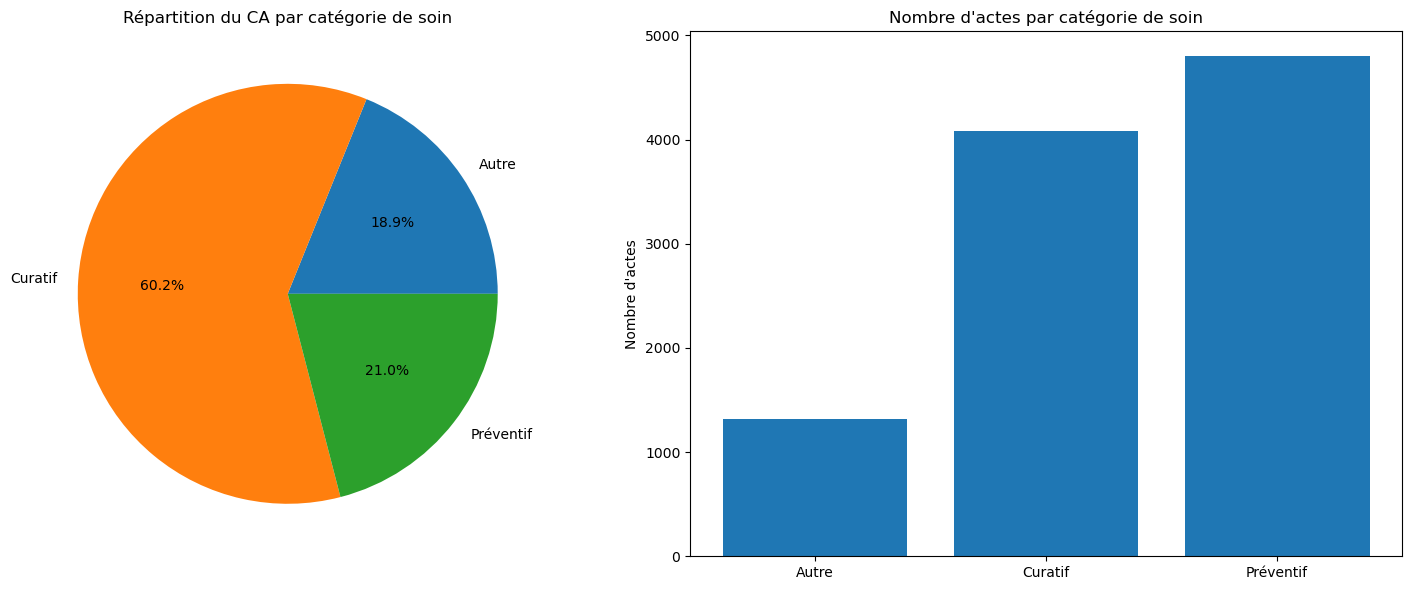

In [425]:
# 🦷 1.4 Comparaison soins préventifs vs curatifs
# Définir les catégories (adaptées à vos données réelles)
soins_preventifs = ['contrôle', 'consultation', 'détartrage', 'examen', 'radiographie', 'nettoyage', 'conseils', 'hygiène']
soins_curatifs = ['carie', 'canal', 'couronne', 'implant', 'extraction', 'obturation', 'chirurgie', 'urgence']

# Créer une colonne de catégorie
def categoriser_soin(soin):
    if pd.isna(soin):
        return 'Autre'
    soin_lower = str(soin).lower()
    if any(preventif.lower() in soin_lower for preventif in soins_preventifs):
        return 'Préventif'
    elif any(curatif.lower() in soin_lower for curatif in soins_curatifs):
        return 'Curatif'
    else:
        return 'Autre'

# Utiliser la bonne colonne (celle qui existe dans vos données)
df['Categorie_soin'] = df['Type De Soin Normalisé'].apply(categoriser_soin)

# Analyse comparative
comparaison_categories = df.groupby('Categorie_soin').agg({
    'montant_total_chf': ['sum', 'mean', 'count'],
    'Patientid': 'nunique'
}).round(2)

print('Comparaison soins préventifs vs curatifs :')
print(comparaison_categories)

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# CA par catégorie
ca_par_categorie = df.groupby('Categorie_soin')['montant_total_chf'].sum()
ax1.pie(ca_par_categorie.values, labels=ca_par_categorie.index, autopct='%1.1f%%')
ax1.set_title('Répartition du CA par catégorie de soin')

# Nombre d'actes par catégorie
actes_par_categorie = df.groupby('Categorie_soin').size()
ax2.bar(actes_par_categorie.index, actes_par_categorie.values)
ax2.set_title('Nombre d\'actes par catégorie de soin')
ax2.set_ylabel('Nombre d\'actes')

plt.tight_layout()
plt.show()

## 👨‍⚕️ 2. Praticiens

### KPIs à analyser :
- **CA moyen par praticien**
- **CA par heure ou par jour travaillé** (si infos dispo)
- **Taux de fidélisation des patients par praticien**
- **Taux de soins en retard de paiement par praticien**

### Analyses :
- Clustering des praticiens par performance (CA, volume, fidélité)
- Corrélation entre ancienneté du praticien et performance


In [426]:
# 👨‍⚕️ 2.1 CA moyen par praticien
if 'nom_complet_praticien' in df.columns:
    ca_par_praticien = df.groupby('nom_complet_praticien')['montant_total_chf'].agg(['sum', 'mean', 'count']).round(2)
    ca_par_praticien.columns = ['CA_total', 'CA_moyen', 'Nombre_actes']
    ca_par_praticien = ca_par_praticien.sort_values('CA_total', ascending=False)
    
    print('Performance par praticien :')
    print(ca_par_praticien)
    
    # Visualisation
    plt.figure(figsize=(12, 8))
    ca_par_praticien.head(10)['CA_total'].plot(kind='bar')
    plt.title('Top 10 praticiens par CA total')
    plt.xlabel('nom_complet_praticien')
    plt.ylabel('CA total (CHF)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('Colonne \'nom_complet_praticien\' non trouvée dans les données')

Colonne 'nom_complet_praticien' non trouvée dans les données


In [427]:
# 👨‍⚕️ 2.2 Taux de fidélisation par praticien
if 'nom_complet_praticien' in df.columns:
    # Calculer le nombre de patients uniques par praticien
    patients_par_praticien = df.groupby('nom_complet_praticien')['patientid'].nunique()
    
    # Calculer le nombre de patients fidèles (plus d'un soin)
    patients_fideles = df.groupby(['nom_complet_praticien', 'patientid']).size().reset_index()
    patients_fideles = patients_fideles[patients_fideles[0] > 1].groupby('nom_complet_praticien').size()
    
    # Calculer le taux de fidélisation
    taux_fidelisation = (patients_fideles / patients_par_praticien * 100).round(2)
    
    print('Taux de fidélisation par praticien :')
    print(taux_fidelisation.sort_values(ascending=False))
    
    # Visualisation
    plt.figure(figsize=(12, 8))
    taux_fidelisation.plot(kind='bar')
    plt.title('Taux de fidélisation par praticien')
    plt.xlabel('nom_complet_praticien')
    plt.ylabel('Taux de fidélisation (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print('Colonne \'nom_complet_praticien\' non trouvée dans les données')

Colonne 'nom_complet_praticien' non trouvée dans les données


## 🧑‍🤝‍🧑 3. Patients

### KPIs à analyser :
- **Taux de rétention** = % de patients revenus 2+ fois
- **Temps moyen entre 2 soins**
- **Nombre de nouveaux patients par mois**
- **Proportion de patients VIP par clinique**

### Analyses :
- Analyse RFM : Récence, Fréquence, Montant
- Profils des VIP vs non-VIP : âge, localisation, clinique, type de soin


Taux de rétention : 14.19%
Nombre de patients fidèles : 1179
Nombre total de patients : 8308


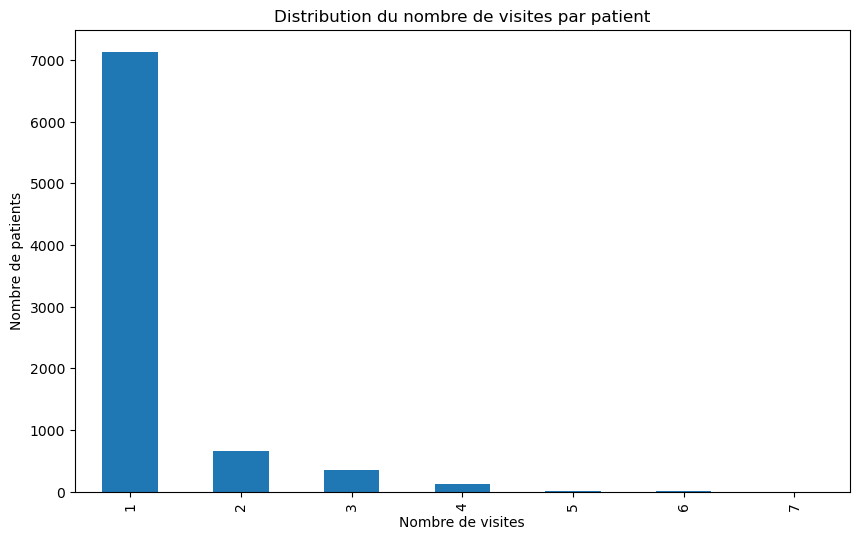

In [428]:
# 🧑‍🤝‍🧑 3.1 Taux de rétention
visites_par_patient = df.groupby('Patientid').size()
patients_fideles = (visites_par_patient > 1).sum()
total_patients = len(visites_par_patient)
taux_retention = (patients_fideles / total_patients * 100).round(2)

print(f'Taux de rétention : {taux_retention}%')
print(f'Nombre de patients fidèles : {patients_fideles}')
print(f'Nombre total de patients : {total_patients}')

# Distribution du nombre de visites
plt.figure(figsize=(10, 6))
visites_par_patient.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution du nombre de visites par patient')
plt.xlabel('Nombre de visites')
plt.ylabel('Nombre de patients')
plt.show()

Temps moyen entre 2 soins : 94.9 jours
Temps médian entre 2 soins : 74.0 jours


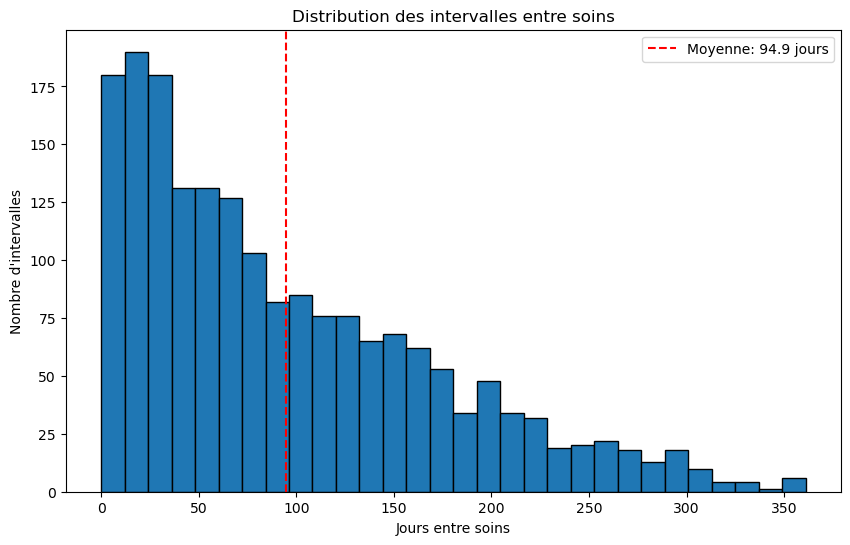

In [429]:
# 🧑‍🤝‍🧑 3.2 Temps moyen entre 2 soins
# Calculer les intervalles entre soins pour chaque patient
df_sorted = df.sort_values(['Patientid', 'Date Du Soin'])
intervalles = []

for patient in df_sorted['Patientid'].unique():
    patient_data = df_sorted[df_sorted['Patientid'] == patient]
    if len(patient_data) > 1:
        dates = patient_data['Date Du Soin'].sort_values()
        for i in range(1, len(dates)):
            intervalle = (dates.iloc[i] - dates.iloc[i-1]).days
            intervalles.append(intervalle)

if intervalles:
    intervalle_moyen = np.mean(intervalles)
    intervalle_median = np.median(intervalles)
    
    print(f'Temps moyen entre 2 soins : {intervalle_moyen:.1f} jours')
    print(f'Temps médian entre 2 soins : {intervalle_median:.1f} jours')
    
    # Histogramme des intervalles
    plt.figure(figsize=(10, 6))
    plt.hist(intervalles, bins=30, edgecolor='black')
    plt.title('Distribution des intervalles entre soins')
    plt.xlabel('Jours entre soins')
    plt.ylabel('Nombre d\'intervalles')
    plt.axvline(intervalle_moyen, color='red', linestyle='--', label=f'Moyenne: {intervalle_moyen:.1f} jours')
    plt.legend()
    plt.show()
else:
    print('Pas assez de données pour calculer les intervalles')

Nouveaux patients par mois :
année-mois
2024-06     336
2024-07     308
2024-08     319
2024-09     342
2024-10     335
2024-11     348
2024-12    1318
2025-01    1563
2025-02    1140
2025-03    1284
2025-04    1146
2025-05    1525
2025-06       5
Freq: M, dtype: int64


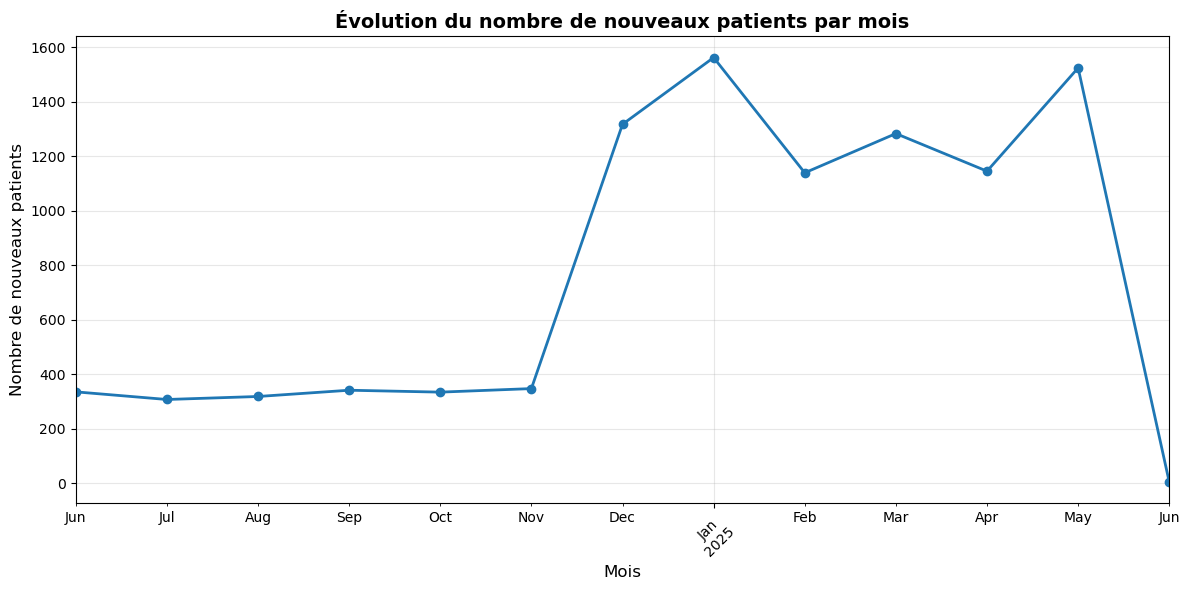

In [430]:
# 🧑‍🤝‍🧑 3.3 Nouveaux patients par mois

# Créer la colonne année-mois si elle n'existe pas
if 'année-mois' not in df.columns:
    df['Date Du Soin'] = pd.to_datetime(df['Date Du Soin'])
    df['année-mois'] = df['Date Du Soin'].dt.to_period('M')

# Identifier les nouveaux patients (première visite de chaque patient)
nouveaux_patients = df.groupby(['année-mois', 'Patientid']).first().reset_index()
nouveaux_patients_mensuel = nouveaux_patients.groupby('année-mois').size()

print('Nouveaux patients par mois :')
print(nouveaux_patients_mensuel)

# Visualisation
plt.figure(figsize=(12, 6))
nouveaux_patients_mensuel.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Évolution du nombre de nouveaux patients par mois', fontsize=14, fontweight='bold')
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre de nouveaux patients', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 💰 4. Paiements et créances

### KPIs à analyser :
- **% de paiements en retard**
- **Montant total des paiements en retard**
- **Délai moyen de paiement**
- **Taux de recouvrement à 30 / 60 / 90 jours**

### Analyses :
- Corrélation entre type de soin ou clinique et retards
- Analyse des retards par canton, ville, ou praticien


In [431]:
# 💰 4.1 Analyse des paiements - Données réelles avec Plotly Express
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Configuration pour affichage
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# Vérifier les colonnes de paiement
colonnes_paiement = [col for col in df.columns if 'paiement' in col.lower() or 'retard' in col.lower() or 'delai' in col.lower()]
print('Colonnes liées aux paiements trouvées :', colonnes_paiement)

# Analyser la colonne Méthode De Paiement
print('\nAnalyse de Méthode De Paiement:')
methodes_paiement = df['Méthode De Paiement'].value_counts()
print(methodes_paiement)
print(f'Valeurs manquantes : {df["Méthode De Paiement"].isnull().sum()}')

# Utiliser la colonne Patientid
col_patient = 'Patientid'

# Analyser les montants par méthode de paiement
print('\n📊 ANALYSE PAR MÉTHODE DE PAIEMENT')
print('=' * 50)

print("Statistiques par méthode de paiement :")
for methode in methodes_paiement.index:
    subset = df[df['Méthode De Paiement'] == methode]
    ca_total = subset['montant_total_chf'].sum()
    nb_transactions = len(subset)
    montant_moyen = subset['montant_total_chf'].mean()
    nb_patients = subset[col_patient].nunique()
    
    print(f'\n🔸 {methode.upper()}')
    print(f'   • CA total: {ca_total:,.2f} CHF')
    print(f'   • Nombre de transactions: {nb_transactions:,}')
    print(f'   • Montant moyen: {montant_moyen:.2f} CHF')
    print(f'   • Patients uniques: {nb_patients:,}')

# Créer des analyses basées sur les données réelles
df['Type_paiement'] = df['Méthode De Paiement'].map({
    'TWINT': 'Immédiat',
    'Carte': 'Immédiat', 
    'Espèces': 'Immédiat',
    'Facture': 'Différé'
})

# Analyse des impayés si colonne disponible
if 'reste_à_charge_chf' in df.columns:
    df['Impaye'] = df['reste_à_charge_chf'] > 0
    
    print('\n💸 ANALYSE DES IMPAYÉS')
    print('=' * 30)
    
    taux_impaye = df['Impaye'].mean() * 100
    montant_impaye = df[df['Impaye']]['reste_à_charge_chf'].sum()
    
    print(f'Taux d\'impayés : {taux_impaye:.2f}%')
    print(f'Montant total impayé : {montant_impaye:,.2f} CHF')
    
    # Impayés par méthode de paiement
    print('\nImpayés par méthode de paiement :')
    impaye_par_methode = df.groupby('Méthode De Paiement')['Impaye'].agg(['sum', 'mean', 'count'])
    impaye_par_methode['taux_impaye'] = (impaye_par_methode['mean'] * 100).round(2)
    
    for methode in impaye_par_methode.index:
        taux = impaye_par_methode.loc[methode, 'taux_impaye']
        nb_impaye = impaye_par_methode.loc[methode, 'sum']
        total = impaye_par_methode.loc[methode, 'count']
        print(f'  • {methode}: {taux}% ({nb_impaye}/{total})')

# Préparer les données pour les visualisations
ca_par_methode = df.groupby('Méthode De Paiement')['montant_total_chf'].sum().reset_index()
ca_par_methode['CA_milliers'] = ca_par_methode['montant_total_chf'] / 1000

montant_moyen_methode = df.groupby('Méthode De Paiement')['montant_total_chf'].mean().reset_index()

# Couleurs personnalisées
colors_discrete = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

# 🎨 VISUALISATIONS PLOTLY EXPRESS
print('\n📊 Création des graphiques interactifs...')

# 1. Répartition des méthodes de paiement (Pie Chart)
fig1 = px.pie(
    values=methodes_paiement.values,
    names=methodes_paiement.index,
    title='💳 Répartition des Méthodes de Paiement',
    color_discrete_sequence=colors_discrete,
    hover_data=[methodes_paiement.values]
)
fig1.update_traces(
    textposition='inside', 
    textinfo='percent+label',
    hovertemplate='<b>%{label}</b><br>Transactions: %{value}<br>Pourcentage: %{percent}<extra></extra>'
)
fig1.update_layout(height=500, showlegend=True)
fig1.show()

# 2. Chiffre d'affaires par méthode (Bar Chart)
fig2 = px.bar(
    ca_par_methode,
    x='Méthode De Paiement',
    y='montant_total_chf',
    title='💰 Chiffre d\'Affaires par Méthode de Paiement',
    color='Méthode De Paiement',
    color_discrete_sequence=colors_discrete,
    text='CA_milliers'
)
fig2.update_traces(
    texttemplate='%{text:.0f}k CHF',
    textposition='outside',
    hovertemplate='<b>%{x}</b><br>CA: %{y:,.0f} CHF<extra></extra>'
)
fig2.update_layout(height=500, showlegend=False)
fig2.update_xaxes(tickangle=45)
fig2.show()

# 3. Distribution des montants par méthode (Box Plot)
fig3 = px.box(
    df,
    x='Méthode De Paiement',
    y='montant_total_chf',
    title='📦 Distribution des Montants par Méthode',
    color='Méthode De Paiement',
    color_discrete_sequence=colors_discrete
)
fig3.update_traces(
    hovertemplate='<b>%{x}</b><br>Montant: %{y:.0f} CHF<extra></extra>'
)
fig3.update_layout(height=500, showlegend=False)
fig3.update_xaxes(tickangle=45)
fig3.show()

# 4. Montant moyen par méthode (Bar Chart horizontal)
fig4 = px.bar(
    montant_moyen_methode,
    x='montant_total_chf',
    y='Méthode De Paiement',
    orientation='h',
    title='📊 Montant Moyen par Méthode de Paiement',
    color='Méthode De Paiement',
    color_discrete_sequence=colors_discrete,
    text='montant_total_chf'
)
fig4.update_traces(
    texttemplate='%{text:.0f} CHF',
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>Montant moyen: %{x:.0f} CHF<extra></extra>'
)
fig4.update_layout(height=400, showlegend=False)
fig4.show()

# 5. Évolution temporelle des méthodes (si date disponible)
if 'date_du_soin' in df.columns:
    df['date_du_soin'] = pd.to_datetime(df['date_du_soin'])
    df['mois'] = df['date_du_soin'].dt.to_period('M').astype(str)
    
    # Évolution des transactions par méthode
    evolution_methodes = df.groupby(['mois', 'Méthode De Paiement']).size().reset_index(name='nb_transactions')
    
    fig5 = px.line(
        evolution_methodes,
        x='mois',
        y='nb_transactions',
        color='Méthode De Paiement',
        title='📈 Évolution des Méthodes de Paiement dans le Temps',
        markers=True,
        color_discrete_sequence=colors_discrete
    )
    fig5.update_traces(
        line=dict(width=3),
        marker=dict(size=8),
        hovertemplate='<b>%{fullData.name}</b><br>Mois: %{x}<br>Transactions: %{y}<extra></extra>'
    )
    fig5.update_layout(height=500)
    fig5.update_xaxes(tickangle=45)
    fig5.show()
    
    # Heatmap de l'activité par méthode et mois
    heatmap_data = df.groupby(['mois', 'Méthode De Paiement'])['montant_total_chf'].sum().unstack(fill_value=0)
    
    fig6 = px.imshow(
        heatmap_data.T,
        title='🔥 Heatmap du CA par Méthode et Mois',
        labels=dict(x="Mois", y="Méthode de Paiement", color="CA (CHF)"),
        aspect="auto",
        color_continuous_scale='Viridis'
    )
    fig6.update_layout(height=400)
    fig6.show()

# 6. Analyse des impayés (si données disponibles)
if 'reste_à_charge_chf' in df.columns and df['reste_à_charge_chf'].sum() > 0:
    
    # Taux d'impayés par méthode
    taux_impaye_data = df.groupby('Méthode De Paiement')['Impaye'].mean().reset_index()
    taux_impaye_data['taux_pourcentage'] = taux_impaye_data['Impaye'] * 100
    taux_impaye_data['couleur'] = taux_impaye_data['taux_pourcentage'].apply(lambda x: 'Élevé' if x > 5 else 'Acceptable')
    
    fig7 = px.bar(
        taux_impaye_data,
        x='Méthode De Paiement',
        y='taux_pourcentage',
        color='couleur',
        title='⚠️ Taux d\'Impayés par Méthode de Paiement',
        color_discrete_map={'Élevé': 'red', 'Acceptable': 'green'},
        text='taux_pourcentage'
    )
    fig7.update_traces(
        texttemplate='%{text:.1f}%',
        textposition='outside',
        hovertemplate='<b>%{x}</b><br>Taux d\'impayés: %{y:.1f}%<extra></extra>'
    )
    fig7.update_layout(height=500)
    fig7.update_xaxes(tickangle=45)
    fig7.show()
    
    # Montants impayés par méthode
    montant_impaye_data = df.groupby('Méthode De Paiement')['reste_à_charge_chf'].sum().reset_index()
    montant_impaye_data = montant_impaye_data[montant_impaye_data['reste_à_charge_chf'] > 0]
    
    if not montant_impaye_data.empty:
        fig8 = px.bar(
            montant_impaye_data,
            x='Méthode De Paiement',
            y='reste_à_charge_chf',
            title='💸 Montants Impayés par Méthode',
            color='reste_à_charge_chf',
            color_continuous_scale='Reds',
            text='reste_à_charge_chf'
        )
        fig8.update_traces(
            texttemplate='%{text:.0f} CHF',
            textposition='outside',
            hovertemplate='<b>%{x}</b><br>Montant impayé: %{y:.0f} CHF<extra></extra>'
        )
        fig8.update_layout(height=500, showlegend=False)
        fig8.update_xaxes(tickangle=45)
        fig8.show()

# 7. Dashboard combiné (4 graphiques en sous-plots)
fig_dashboard = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Répartition des Méthodes', 'CA par Méthode', 'Montants Moyens', 'Nombre de Patients'),
    specs=[[{"type": "pie"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]]
)

# Pie chart
fig_dashboard.add_trace(
    go.Pie(values=methodes_paiement.values, labels=methodes_paiement.index, 
           marker_colors=colors_discrete[:len(methodes_paiement)]),
    row=1, col=1
)

# CA par méthode
fig_dashboard.add_trace(
    go.Bar(x=ca_par_methode['Méthode De Paiement'], y=ca_par_methode['montant_total_chf'],
           marker_color=colors_discrete[:len(ca_par_methode)], name='CA'),
    row=1, col=2
)

# Montants moyens
fig_dashboard.add_trace(
    go.Bar(x=montant_moyen_methode['Méthode De Paiement'], y=montant_moyen_methode['montant_total_chf'],
           marker_color=colors_discrete[:len(montant_moyen_methode)], name='Moyenne'),
    row=2, col=1
)

# Nombre de patients par méthode
patients_par_methode = df.groupby('Méthode De Paiement')[col_patient].nunique().reset_index()
fig_dashboard.add_trace(
    go.Bar(x=patients_par_methode['Méthode De Paiement'], y=patients_par_methode[col_patient],
           marker_color=colors_discrete[:len(patients_par_methode)], name='Patients'),
    row=2, col=2
)

fig_dashboard.update_layout(
    height=800,
    title_text="💰 Dashboard Complet des Paiements",
    title_x=0.5,
    showlegend=False
)

fig_dashboard.show()

# Recommandations basées sur les données
print('\n🎯 RECOMMANDATIONS STRATÉGIQUES')
print('=' * 40)

methode_principale = methodes_paiement.index[0]
print(f'• Méthode principale: {methode_principale} ({methodes_paiement.iloc[0]} transactions)')

if 'Facture' in methodes_paiement.index:
    facture_count = methodes_paiement['Facture']
    facture_pct = (facture_count / methodes_paiement.sum()) * 100
    print(f'• Paiements différés (Facture): {facture_pct:.1f}% - Surveiller les impayés')

twint_carte = 0
if 'TWINT' in methodes_paiement.index:
    twint_carte += methodes_paiement['TWINT']
if 'Carte' in methodes_paiement.index:
    twint_carte += methodes_paiement['Carte']

if twint_carte > methodes_paiement.sum() * 0.5:
    print('• Excellente digitalisation des paiements (TWINT + Carte > 50%)')

print('\n✅ Analyse des paiements terminée avec succès!')

Colonnes liées aux paiements trouvées : ['Méthode De Paiement', 'Date Paiement', 'Retard Paiement Jours', 'Retard']

Analyse de Méthode De Paiement:
Méthode De Paiement
TWINT      3266
Facture    2463
Carte      2447
Espèces    2024
Name: count, dtype: int64
Valeurs manquantes : 0

📊 ANALYSE PAR MÉTHODE DE PAIEMENT
Statistiques par méthode de paiement :

🔸 TWINT
   • CA total: 1,157,964.41 CHF
   • Nombre de transactions: 3,266
   • Montant moyen: 354.55 CHF
   • Patients uniques: 3,094

🔸 FACTURE
   • CA total: 1,165,488.49 CHF
   • Nombre de transactions: 2,463
   • Montant moyen: 473.20 CHF
   • Patients uniques: 2,304

🔸 CARTE
   • CA total: 1,067,582.47 CHF
   • Nombre de transactions: 2,447
   • Montant moyen: 436.28 CHF
   • Patients uniques: 2,275

🔸 ESPÈCES
   • CA total: 954,770.06 CHF
   • Nombre de transactions: 2,024
   • Montant moyen: 471.72 CHF
   • Patients uniques: 1,868

📊 Création des graphiques interactifs...



🎯 RECOMMANDATIONS STRATÉGIQUES
• Méthode principale: TWINT (3266 transactions)
• Paiements différés (Facture): 24.1% - Surveiller les impayés
• Excellente digitalisation des paiements (TWINT + Carte > 50%)

✅ Analyse des paiements terminée avec succès!


In [432]:
df.columns

Index(['Patientid', 'Nom', 'Prénom', 'Sexe', 'Âge', 'Assurance',
       'Date Du Soin', 'Heure Début', 'Durée Minutes', 'Type De Soin',
       'Catégorie Soin', 'Dentiste', 'Type De Praticien', 'Cabinet',
       'Montant Total Chf', 'montant_total_chf', 'Somme Non Remboursée (CHF)',
       'Taux De Remboursement %', 'Revenu Horaire Chf/H',
       'Méthode De Paiement', 'Satisfaction 1-5', 'Nb Visites Patient',
       'Patient Fidèle', 'Type De Patient', 'Type De Soin Normalisé',
       'Formule', 'Canton Clinique', 'Nom De La Clinique',
       'Nom Complet Praticien', 'Rdv Manqué', 'Date Paiement',
       'Retard Paiement Jours', 'Retard', 'Adresse', 'Code Postal', 'Ville',
       'Annee', 'mois', 'Annee-mois', 'Tranche Age', 'Categorie_soin',
       'année-mois', 'Type_paiement'],
      dtype='object')

In [442]:
df.columns

Index(['Patientid', 'Nom', 'Prénom', 'Sexe', 'Âge', 'Assurance',
       'Date Du Soin', 'Heure Début', 'Durée Minutes', 'Type De Soin',
       'Catégorie Soin', 'Dentiste', 'Type De Praticien', 'Cabinet',
       'Montant Total Chf', 'montant_total_chf', 'Somme Non Remboursée (CHF)',
       'Taux De Remboursement %', 'Revenu Horaire Chf/H',
       'Méthode De Paiement', 'Satisfaction 1-5', 'Nb Visites Patient',
       'Patient Fidèle', 'Type De Patient', 'Type De Soin Normalisé',
       'Formule', 'Canton Clinique', 'Nom De La Clinique',
       'Nom Complet Praticien', 'Rdv Manqué', 'Date Paiement',
       'Retard Paiement Jours', 'Retard', 'Adresse', 'Code Postal', 'Ville',
       'Annee', 'mois', 'Annee-mois', 'Tranche Age', 'Categorie_soin',
       'année-mois', 'Type_paiement'],
      dtype='object')

Taux de retard par type de soin :
                       Taux_retard Nombre_retards  Nombre_total  \
Type De Soin Normalisé                                            
blanchiment                    1.0            631           631   
carie                          1.0           1737          1737   
chirurgie complexe             1.0            346           346   
conseils d’hygiène             1.0            337           337   
consultation                   1.0            320           320   
consultation devis             1.0            579           579   
contrôle annuel                1.0           2314          2314   
couronne                       1.0            304           304   
détartrage                     1.0           1218          1218   
extraction                     1.0            539           539   

                       Taux_retard_pct  
Type De Soin Normalisé                  
blanchiment                      100.0  
carie                            100.0

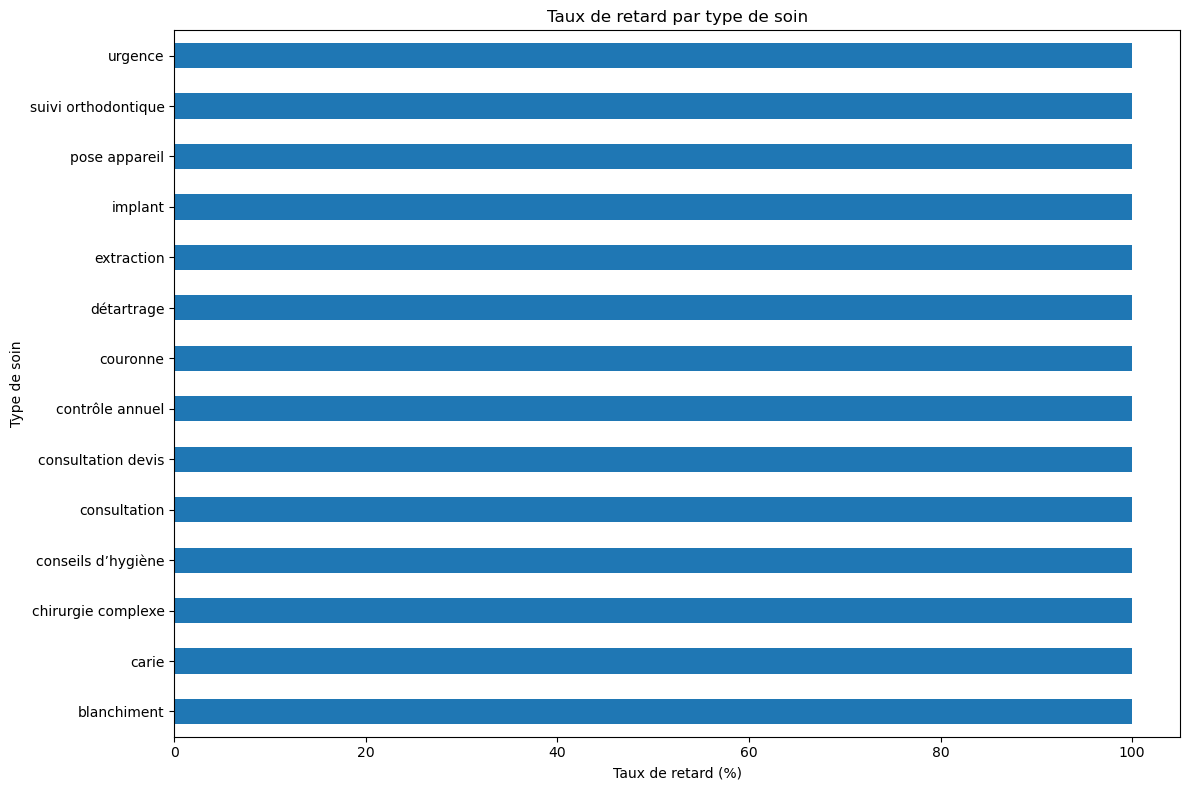

In [450]:
import matplotlib.pyplot as plt

# 💰 4.2 Analyse des retards par type de soin
if 'Retard' in df.columns:
    retards_par_soin = df.groupby('Type De Soin Normalisé')['Retard'].agg(['mean', 'sum', 'count']).round(4)
    retards_par_soin.columns = ['Taux_retard', 'Nombre_retards', 'Nombre_total']
    retards_par_soin['Taux_retard_pct'] = retards_par_soin['Taux_retard'] * 100

    print('Taux de retard par type de soin :')
    print(retards_par_soin.sort_values('Taux_retard_pct', ascending=False).head(10))

    # Visualisation
    plt.figure(figsize=(12, 8))
    retards_par_soin.sort_values('Taux_retard_pct', ascending=True).tail(15)['Taux_retard_pct'].plot(kind='barh')
    plt.title('Taux de retard par type de soin')
    plt.xlabel('Taux de retard (%)')
    plt.ylabel('Type de soin')
    plt.tight_layout()
    plt.show()
else:
    print("Colonne 'retard' non disponible")


## 🏥 5. Analyse géographique

### KPIs à analyser :
- **CA par clinique / canton / ville**
- **Nombre de patients uniques par région**
- **Taux de VIP par région**

### Analyses :
- Visualisation cartographique des performances
- Benchmark entre cliniques


In [451]:
# 🏥 5.1 CA par ville/canton
if 'nom_de_la_clinique' in df.columns:
    ca_par_ville = df.groupby('nom_de_la_clinique')['montant_total_chf'].agg(['sum', 'mean', 'count']).round(2)
    ca_par_ville.columns = ['CA_total', 'CA_moyen', 'Nombre_actes']
    ca_par_ville = ca_par_ville.sort_values('CA_total', ascending=False)
    
    print('CA par ville (Top 15) :')
    print(ca_par_ville.head(15))
    
    # Visualisation
    plt.figure(figsize=(12, 8))
    ca_par_ville.head(15)['CA_total'].plot(kind='barh')
    plt.title('CA total par ville')
    plt.xlabel('CA total (CHF)')
    plt.ylabel('nom_de_la_clinique')
    plt.tight_layout()
    plt.show()
else:
    print('Colonne \'nom_de_la_clinique\' non trouvée')

Colonne 'nom_de_la_clinique' non trouvée


In [452]:
# 🏥 5.2 patientids uniques par région
if 'nom_de_la_clinique' in df.columns:
    patients_par_ville = df.groupby('nom_de_la_clinique')['patientid'].nunique().sort_values(ascending=False)
    
    print('Nombre de patients uniques par ville (Top 15) :')
    print(patients_par_ville.head(15))
    
    # Visualisation
    plt.figure(figsize=(12, 8))
    patients_par_ville.head(15).plot(kind='barh')
    plt.title('Nombre de patients uniques par ville')
    plt.xlabel('Nombre de patients')
    plt.ylabel('nom_de_la_clinique')
    plt.tight_layout()
    plt.show()
else:
    print('Colonne \'nom_de_la_clinique\' non trouvée')

Colonne 'nom_de_la_clinique' non trouvée


In [458]:
df.columns

Index(['Patientid', 'Nom', 'Prénom', 'Sexe', 'Âge', 'Assurance',
       'Date Du Soin', 'Heure Début', 'Durée Minutes', 'Type De Soin',
       'Catégorie Soin', 'Dentiste', 'Type De Praticien', 'Cabinet',
       'Montant Total Chf', 'montant_total_chf', 'Somme Non Remboursée (CHF)',
       'Taux De Remboursement %', 'Revenu Horaire Chf/H',
       'Méthode De Paiement', 'Satisfaction 1-5', 'Nb Visites Patient',
       'Patient Fidèle', 'Type De Patient', 'Type De Soin Normalisé',
       'Formule', 'Canton Clinique', 'Nom De La Clinique',
       'Nom Complet Praticien', 'Rdv Manqué', 'Date Paiement',
       'Retard Paiement Jours', 'Retard', 'Adresse', 'Code Postal', 'Ville',
       'Annee', 'mois', 'Annee-mois', 'Tranche Age', 'Categorie_soin',
       'année-mois', 'Type_paiement'],
      dtype='object')

In [462]:
df["Type De Patient"].unique()

array(['Fidèle', 'Occasionnel', 'Nouveau'], dtype=object)

In [467]:
df["Montant Total Chf"].max()

4496.52

In [469]:
# 🏥 5.3 Taux de VIP par région
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Vérifier les colonnes disponibles pour l'analyse géographique
print("Colonnes disponibles pour l'analyse géographique :")
colonnes_geo = ['Cabinet', 'Canton Clinique', 'Nom De La Clinique', 'Ville']
for col in colonnes_geo:
    if col in df.columns:
        print(f"✅ {col} - {df[col].nunique()} valeurs uniques")
    else:
        print(f"❌ {col} - Non disponible")

# Définir les clients VIP basés sur le montant total dépensé (> 20,000 CHF)
print("\n💎 DÉFINITION DES CLIENTS VIP")
print("=" * 40)

# Utiliser la colonne avec les bons noms
col_montant = 'Montant Total Chf' if 'Montant Total Chf' in df.columns else 'montant_total_chf'

# Calculer le montant total dépensé par patient
montant_par_patient = df.groupby('Patientid')[col_montant].sum()

# Définir les VIP comme ceux ayant dépensé plus de 3,000 CHF
seuil_vip = 3000
patients_vip = montant_par_patient[montant_par_patient > seuil_vip].index

# Créer une colonne VIP dans le DataFrame
df['Est_VIP'] = df['Patientid'].isin(patients_vip)

print(f"Seuil VIP : {seuil_vip:,} CHF")
print(f"Nombre de patients VIP : {len(patients_vip):,}")
print(f"Pourcentage de VIP : {(len(patients_vip) / df['Patientid'].nunique() * 100):.2f}%")
print(f"Montant moyen dépensé par VIP : {montant_par_patient[patients_vip].mean():,.2f} CHF")

# Vérifier aussi les VIP existants dans 'Type De Patient'
if 'Type De Patient' in df.columns:
    vip_existants = df[df['Type De Patient'] == 'VIP']['Patientid'].nunique()
    print(f"VIP déjà identifiés dans 'Type De Patient' : {vip_existants}")

# Choisir la colonne géographique pour l'analyse
print(f"\n🗺️ CHOIX DE LA DIMENSION GÉOGRAPHIQUE")
print("=" * 40)

# Priorité : Cabinet > Ville > Canton > Clinique
if 'Cabinet' in df.columns and df['Cabinet'].nunique() > 1:
    col_region = 'Cabinet'
    print(f"✅ Analyse par Cabinet ({df[col_region].nunique()} cabinets)")
elif 'Ville' in df.columns and df['Ville'].nunique() > 1:
    col_region = 'Ville'
    print(f"✅ Analyse par Ville ({df[col_region].nunique()} villes)")
elif 'Canton Clinique' in df.columns and df['Canton Clinique'].nunique() > 1:
    col_region = 'Canton Clinique'
    print(f"✅ Analyse par Canton ({df[col_region].nunique()} cantons)")
elif 'Nom De La Clinique' in df.columns and df['Nom De La Clinique'].nunique() > 1:
    col_region = 'Nom De La Clinique'
    print(f"✅ Analyse par Clinique ({df[col_region].nunique()} cliniques)")
else:
    print("⚠️ Aucune colonne géographique appropriée trouvée")
    col_region = None

if col_region:
    print(f"\n📊 ANALYSE VIP PAR {col_region.upper()}")
    print("=" * 50)
    
    # Calculer le taux de VIP par région
    # D'abord, obtenir les patients uniques par région avec leur statut VIP
    patients_par_region = df.groupby([col_region, 'Patientid'])['Est_VIP'].first().reset_index()
    
    # Calculer le taux de VIP par région
    vip_par_region = patients_par_region.groupby(col_region).agg({
        'Est_VIP': ['sum', 'count', 'mean']
    }).round(3)
    
    vip_par_region.columns = ['nb_vip', 'nb_total_patients', 'taux_vip']
    vip_par_region['taux_vip_pourcentage'] = (vip_par_region['taux_vip'] * 100).round(2)
    vip_par_region = vip_par_region.sort_values('taux_vip_pourcentage', ascending=False)
    
    print('Taux de patients VIP par région (Top 15) :')
    print(vip_par_region.head(15))
    
    # Préparer les données pour Plotly
    top_15_regions = vip_par_region.head(15).reset_index()
    
    # 1. Graphique en barres horizontales du taux de VIP
    fig1 = px.bar(
        top_15_regions,
        y=col_region,
        x='taux_vip_pourcentage',
        orientation='h',
        title=f'🏆 Taux de Patients VIP par {col_region.replace("_", " ").title()}',
        labels={'taux_vip_pourcentage': 'Taux de VIP (%)', col_region: col_region.replace("_", " ").title()},
        color='taux_vip_pourcentage',
        color_continuous_scale='Viridis',
        text='taux_vip_pourcentage'
    )
    
    fig1.update_traces(
        texttemplate='%{text:.1f}%',
        textposition='outside',
        hovertemplate=f'<b>%{{y}}</b><br>Taux VIP: %{{x:.1f}}%<br>VIP: %{{customdata[0]}}<br>Total patients: %{{customdata[1]}}<extra></extra>',
        customdata=top_15_regions[['nb_vip', 'nb_total_patients']].values
    )
    
    fig1.update_layout(
        height=600,
        xaxis_title="Taux de VIP (%)",
        yaxis_title=col_region.replace("_", " ").title()
    )
    fig1.show()
    
    # 2. Graphique en barres du nombre absolu de VIP
    fig2 = px.bar(
        top_15_regions,
        x=col_region,
        y='nb_vip',
        title=f'📊 Nombre de Patients VIP par {col_region.replace("_", " ").title()}',
        labels={'nb_vip': 'Nombre de VIP', col_region: col_region.replace("_", " ").title()},
        color='nb_vip',
        color_continuous_scale='Blues',
        text='nb_vip'
    )
    
    fig2.update_traces(
        textposition='outside',
        hovertemplate=f'<b>%{{x}}</b><br>Nombre de VIP: %{{y}}<br>Taux: %{{customdata:.1f}}%<extra></extra>',
        customdata=top_15_regions['taux_vip_pourcentage']
    )
    
    fig2.update_layout(height=500)
    fig2.update_xaxes(tickangle=45)
    fig2.show()
    
    # 3. Scatter plot : Taux VIP vs Nombre total de patients
    fig3 = px.scatter(
        vip_par_region.reset_index(),
        x='nb_total_patients',
        y='taux_vip_pourcentage',
        size='nb_vip',
        color='taux_vip_pourcentage',
        title='💎 Relation entre Taille de la Clientèle et Taux de VIP',
        labels={
            'nb_total_patients': 'Nombre Total de Patients',
            'taux_vip_pourcentage': 'Taux de VIP (%)',
            'nb_vip': 'Nombre de VIP'
        },
        hover_name=col_region,
        color_continuous_scale='Plasma'
    )
    
    fig3.update_traces(
        hovertemplate='<b>%{hovertext}</b><br>Total patients: %{x}<br>Taux VIP: %{y:.1f}%<br>Nombre VIP: %{marker.size}<extra></extra>'
    )
    
    fig3.update_layout(height=500)
    fig3.show()
    
    # 4. Analyse du CA généré par les VIP par région
    ca_vip_par_region = df[df['Est_VIP']].groupby(col_region)[col_montant].sum().reset_index()
    ca_vip_par_region = ca_vip_par_region.sort_values(col_montant, ascending=False).head(15)
    
    fig4 = px.bar(
        ca_vip_par_region,
        x=col_region,
        y=col_montant,
        title='💰 Chiffre d\'Affaires généré par les VIP par Région',
        labels={col_montant: 'CA VIP (CHF)', col_region: col_region.replace("_", " ").title()},
        color=col_montant,
        color_continuous_scale='Reds',
        text=col_montant
    )
    
    fig4.update_traces(
        texttemplate='%{text:,.0f}',
        textposition='outside',
        hovertemplate='<b>%{x}</b><br>CA VIP: %{y:,.0f} CHF<extra></extra>'
    )
    
    fig4.update_layout(height=500)
    fig4.update_xaxes(tickangle=45)
    fig4.show()
    
    # 5. Comparaison VIP vs Non-VIP par région (graphique empilé)
    comparison_data = df.groupby([col_region, 'Est_VIP']).size().unstack(fill_value=0).reset_index()
    comparison_data.columns = [col_region, 'Non_VIP', 'VIP']
    comparison_data['Total'] = comparison_data['Non_VIP'] + comparison_data['VIP']
    comparison_data = comparison_data.sort_values('Total', ascending=False).head(10)
    
    fig5 = go.Figure()
    
    fig5.add_trace(go.Bar(
        name='Non-VIP',
        x=comparison_data[col_region],
        y=comparison_data['Non_VIP'],
        marker_color='lightblue',
        hovertemplate='<b>%{x}</b><br>Non-VIP: %{y}<extra></extra>'
    ))
    
    fig5.add_trace(go.Bar(
        name='VIP',
        x=comparison_data[col_region],
        y=comparison_data['VIP'],
        marker_color='gold',
        hovertemplate='<b>%{x}</b><br>VIP: %{y}<extra></extra>'
    ))
    
    fig5.update_layout(
        title='👥 Répartition VIP vs Non-VIP par Région (Top 10)',
        xaxis_title=col_region.replace("_", " ").title(),
        yaxis_title='Nombre de Patients',
        barmode='stack',
        height=500
    )
    fig5.update_xaxes(tickangle=45)
    fig5.show()
    
    # Recommandations stratégiques
    print('\n🎯 INSIGHTS STRATÉGIQUES VIP')
    print('=' * 40)
    
    region_top_vip = vip_par_region.index[0]
    taux_top = vip_par_region.iloc[0]['taux_vip_pourcentage']
    
    print(f'• Région avec le plus haut taux de VIP : {region_top_vip} ({taux_top}%)')
    
    ca_total_vip = df[df['Est_VIP']][col_montant].sum()
    ca_total = df[col_montant].sum()
    part_ca_vip = (ca_total_vip / ca_total) * 100
    
    print(f'• Les VIP représentent {part_ca_vip:.1f}% du CA total')
    print(f'• CA moyen par VIP : {(ca_total_vip / len(patients_vip)):,.2f} CHF')
    
    if part_ca_vip > 30:
        print('• 🔥 Forte dépendance aux VIP - Développer des programmes de fidélisation')
    elif part_ca_vip < 10:
        print('• 📈 Potentiel d\'upselling - Identifier les clients à fort potentiel')
    
    # Analyse additionnelle avec Type De Patient existant
    if 'Type De Patient' in df.columns:
        print('\n📊 COMPARAISON AVEC LES VIP EXISTANTS')
        print('=' * 40)
        
        vip_calcules = set(patients_vip)
        vip_declares = set(df[df['Type De Patient'] == 'VIP']['Patientid'].unique())
        
        print(f'• VIP calculés (>20k CHF) : {len(vip_calcules)}')
        print(f'• VIP déclarés dans les données : {len(vip_declares)}')
        print(f'• VIP en commun : {len(vip_calcules.intersection(vip_declares))}')
        print(f'• VIP uniquement calculés : {len(vip_calcules - vip_declares)}')
        print(f'• VIP uniquement déclarés : {len(vip_declares - vip_calcules)}')
    
else:
    print('Colonnes de région/cabinet non trouvées dans le dataset')

print('\n✅ Analyse VIP terminée avec succès!')

Colonnes disponibles pour l'analyse géographique :
✅ Cabinet - 4 valeurs uniques
✅ Canton Clinique - 2 valeurs uniques
✅ Nom De La Clinique - 6 valeurs uniques
✅ Ville - 7 valeurs uniques

💎 DÉFINITION DES CLIENTS VIP
Seuil VIP : 3,000 CHF
Nombre de patients VIP : 494
Pourcentage de VIP : 5.95%
Montant moyen dépensé par VIP : 4,537.89 CHF
VIP déjà identifiés dans 'Type De Patient' : 0

🗺️ CHOIX DE LA DIMENSION GÉOGRAPHIQUE
✅ Analyse par Cabinet (4 cabinets)

📊 ANALYSE VIP PAR CABINET
Taux de patients VIP par région (Top 15) :
                 nb_vip  nb_total_patients  taux_vip  taux_vip_pourcentage
Cabinet                                                                   
Genève Cornavin     316               1091     0.290                  29.0
Eaux-Vives          313               1093     0.286                  28.6
Meyrin              292               1098     0.266                  26.6
Yverdon               0               6120     0.000                   0.0



🎯 INSIGHTS STRATÉGIQUES VIP
• Région avec le plus haut taux de VIP : Genève Cornavin (29.0%)
• Les VIP représentent 38.8% du CA total
• CA moyen par VIP : 4,537.89 CHF
• 🔥 Forte dépendance aux VIP - Développer des programmes de fidélisation

📊 COMPARAISON AVEC LES VIP EXISTANTS
• VIP calculés (>20k CHF) : 494
• VIP déclarés dans les données : 0
• VIP en commun : 0
• VIP uniquement calculés : 494
• VIP uniquement déclarés : 0

✅ Analyse VIP terminée avec succès!


## 📅 6. Analyse temporelle

### KPIs à analyser :
- **CA par mois / trimestre / année**
- **Nombre de patients par mois**
- **Répartition des soins dans l'année (saisonnalité)**


In [472]:
# 📅 6.1 CA par période - Adapté aux colonnes réelles
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Configuration
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# Vérifier et utiliser les bonnes colonnes
print("🔍 Vérification des colonnes disponibles :")
print("=" * 40)

# Colonne montant
col_montant = 'Montant Total Chf' if 'Montant Total Chf' in df.columns else 'montant_total_chf'
print(f"✅ Colonne montant utilisée : {col_montant}")

# Colonne date
col_date = 'Date Du Soin' if 'Date Du Soin' in df.columns else 'date_du_soin'
print(f"✅ Colonne date utilisée : {col_date}")

# Colonnes temporelles disponibles
colonnes_temps = ['année-mois', 'Annee-mois', 'Annee', 'mois']
for col in colonnes_temps:
    if col in df.columns:
        print(f"✅ {col} disponible ({df[col].nunique()} valeurs uniques)")
    else:
        print(f"❌ {col} non disponible")

# Préparer les données temporelles si nécessaire
if 'Date Du Soin' in df.columns:
    df['Date Du Soin'] = pd.to_datetime(df['Date Du Soin'])
    
    # Créer les colonnes si elles n'existent pas
    if 'Annee' not in df.columns:
        df['Annee'] = df['Date Du Soin'].dt.year
    if 'mois' not in df.columns:
        df['mois'] = df['Date Du Soin'].dt.month
    if 'année-mois' not in df.columns:
        df['année-mois'] = df['Date Du Soin'].dt.to_period('M')
    
    # Créer une version string pour Plotly (compatible JSON)
    df['année-mois-str'] = df['Date Du Soin'].dt.to_period('M').astype(str)
elif 'année-mois' in df.columns:
    # Si la colonne existe déjà, s'assurer qu'elle est en format string
    df['année-mois-str'] = df['année-mois'].astype(str)

print(f"\n📊 ANALYSE DU CHIFFRE D'AFFAIRES PAR PÉRIODE")
print("=" * 50)

# 1. CA par mois
if 'année-mois' in df.columns or 'année-mois-str' in df.columns:
    # Utiliser la version string pour éviter les erreurs Period
    col_mois = 'année-mois-str' if 'année-mois-str' in df.columns else 'année-mois'
    if col_mois == 'année-mois':
        df['année-mois-str'] = df['année-mois'].astype(str)
        col_mois = 'année-mois-str'
    
    ca_mensuel = df.groupby(col_mois)[col_montant].sum().sort_index()
    print('📅 CA mensuel (derniers 12 mois):')
    print(ca_mensuel.tail(12))
else:
    print("⚠️ Colonne 'année-mois' non disponible")

# 2. CA par trimestre
if 'Date Du Soin' in df.columns and 'Annee' in df.columns:
    # Créer les colonnes trimestre
    df['Trimestre'] = df['Date Du Soin'].dt.quarter
    df['Annee-Trimestre'] = df['Annee'].astype(str) + '-T' + df['Trimestre'].astype(str)
    
    ca_trimestriel = df.groupby('Annee-Trimestre')[col_montant].sum()
    print('\n📅 CA trimestriel :')
    print(ca_trimestriel)

# 3. CA par année
if 'Annee' in df.columns:
    ca_annuel = df.groupby('Annee')[col_montant].sum()
    print('\n📅 CA annuel :')
    print(ca_annuel)

# 🎨 VISUALISATIONS PLOTLY
print(f"\n📊 Création des graphiques interactifs...")

# Préparer les données pour Plotly (convertir Period en string)
ca_mensuel_df = ca_mensuel.reset_index() if ('année-mois' in df.columns or 'année-mois-str' in df.columns) else pd.DataFrame()
ca_mensuel_df.columns = ['Période', 'CA'] if not ca_mensuel_df.empty else []

if 'Annee-Trimestre' in locals():
    ca_trimestriel_df = ca_trimestriel.reset_index()
    ca_trimestriel_df.columns = ['Trimestre', 'CA']
else:
    ca_trimestriel_df = pd.DataFrame()

ca_annuel_df = ca_annuel.reset_index() if 'Annee' in df.columns else pd.DataFrame()
ca_annuel_df.columns = ['Année', 'CA'] if not ca_annuel_df.empty else []

# 1. Évolution mensuelle du CA (Line Chart)
if not ca_mensuel_df.empty:
    fig1 = px.line(
        ca_mensuel_df,
        x='Période',
        y='CA',
        title='📈 Évolution du Chiffre d\'Affaires Mensuel',
        markers=True,
        line_shape='spline'
    )
    
    fig1.update_traces(
        line=dict(width=3, color='#2E86AB'),
        marker=dict(size=8, color='#A23B72'),
        hovertemplate='<b>%{x}</b><br>CA: %{y:,.0f} CHF<extra></extra>'
    )
    
    fig1.update_layout(
        height=500,
        xaxis_title="Mois",
        yaxis_title="Chiffre d'Affaires (CHF)",
        hovermode='x unified'
    )
    
    fig1.add_hline(
        y=ca_mensuel_df['CA'].mean(),
        line_dash="dash",
        line_color="red",
        annotation_text=f"Moyenne: {ca_mensuel_df['CA'].mean():,.0f} CHF"
    )
    
    fig1.update_xaxes(tickangle=45)
    fig1.show()
    
    # Statistiques mensuelles
    print(f"\n📊 STATISTIQUES MENSUELLES")
    print("=" * 30)
    print(f"• CA mensuel moyen : {ca_mensuel_df['CA'].mean():,.2f} CHF")
    print(f"• CA mensuel médian : {ca_mensuel_df['CA'].median():,.2f} CHF")
    print(f"• Meilleur mois : {ca_mensuel_df.loc[ca_mensuel_df['CA'].idxmax(), 'Période']} ({ca_mensuel_df['CA'].max():,.0f} CHF)")
    print(f"• Moins bon mois : {ca_mensuel_df.loc[ca_mensuel_df['CA'].idxmin(), 'Période']} ({ca_mensuel_df['CA'].min():,.0f} CHF)")

# 2. CA par trimestre (Bar Chart)
if not ca_trimestriel_df.empty:
    fig2 = px.bar(
        ca_trimestriel_df,
        x='Trimestre',
        y='CA',
        title='📊 Chiffre d\'Affaires par Trimestre',
        color='CA',
        color_continuous_scale='Viridis',
        text='CA'
    )
    
    fig2.update_traces(
        texttemplate='%{text:,.0f}',
        textposition='outside',
        hovertemplate='<b>%{x}</b><br>CA: %{y:,.0f} CHF<extra></extra>'
    )
    
    fig2.update_layout(
        height=500,
        xaxis_title="Trimestre",
        yaxis_title="Chiffre d'Affaires (CHF)",
        showlegend=False
    )
    
    fig2.update_xaxes(tickangle=45)
    fig2.show()

# 3. CA par année (Bar Chart avec croissance)
if not ca_annuel_df.empty and len(ca_annuel_df) > 1:
    # Calculer la croissance année sur année
    ca_annuel_df['Croissance'] = ca_annuel_df['CA'].pct_change() * 100
    ca_annuel_df['Couleur_Croissance'] = ca_annuel_df['Croissance'].apply(
        lambda x: 'Positive' if x > 0 else 'Négative' if x < 0 else 'Stable'
    )
    
    fig3 = px.bar(
        ca_annuel_df,
        x='Année',
        y='CA',
        title='📊 Chiffre d\'Affaires Annuel avec Taux de Croissance',
        color='Couleur_Croissance',
        color_discrete_map={
            'Positive': '#27AE60',
            'Négative': '#E74C3C',
            'Stable': '#95A5A6'
        },
        text='CA',
        hover_data=['Croissance']
    )
    
    fig3.update_traces(
        texttemplate='%{text:,.0f}',
        textposition='outside',
        hovertemplate='<b>%{x}</b><br>CA: %{y:,.0f} CHF<br>Croissance: %{customdata[0]:.1f}%<extra></extra>'
    )
    
    fig3.update_layout(
        height=500,
        xaxis_title="Année",
        yaxis_title="Chiffre d'Affaires (CHF)"
    )
    
    fig3.show()
    
    # Statistiques annuelles
    print(f"\n📊 STATISTIQUES ANNUELLES")
    print("=" * 30)
    for _, row in ca_annuel_df.iterrows():
        croissance_text = f" ({row['Croissance']:+.1f}%)" if not pd.isna(row['Croissance']) else ""
        print(f"• {int(row['Année'])} : {row['CA']:,.0f} CHF{croissance_text}")

# 4. Dashboard combiné (3 graphiques en sous-plots)
if not ca_mensuel_df.empty or not ca_annuel_df.empty:
    fig_dashboard = make_subplots(
        rows=3, cols=1,
        subplot_titles=('Évolution Mensuelle', 'Évolution Trimestrielle', 'Évolution Annuelle'),
        vertical_spacing=0.1
    )
    
    # Graphique mensuel
    if not ca_mensuel_df.empty:
        fig_dashboard.add_trace(
            go.Scatter(
                x=ca_mensuel_df['Période'],
                y=ca_mensuel_df['CA'],
                mode='lines+markers',
                name='CA Mensuel',
                line=dict(color='#2E86AB', width=2),
                marker=dict(size=6)
            ),
            row=1, col=1
        )
    
    # Graphique trimestriel
    if not ca_trimestriel_df.empty:
        fig_dashboard.add_trace(
            go.Bar(
                x=ca_trimestriel_df['Trimestre'],
                y=ca_trimestriel_df['CA'],
                name='CA Trimestriel',
                marker_color='#A23B72'
            ),
            row=2, col=1
        )
    
    # Graphique annuel
    if not ca_annuel_df.empty:
        fig_dashboard.add_trace(
            go.Bar(
                x=ca_annuel_df['Année'],
                y=ca_annuel_df['CA'],
                name='CA Annuel',
                marker_color='#F18F01'
            ),
            row=3, col=1
        )
    
    fig_dashboard.update_layout(
        height=1200,
        title_text="📊 Dashboard Complet - Évolution du Chiffre d'Affaires",
        title_x=0.5,
        showlegend=False
    )
    
    # Mise en forme des axes
    fig_dashboard.update_xaxes(tickangle=45, row=1, col=1)
    fig_dashboard.update_xaxes(tickangle=45, row=2, col=1)
    fig_dashboard.update_yaxes(title_text="CA (CHF)", row=1, col=1)
    fig_dashboard.update_yaxes(title_text="CA (CHF)", row=2, col=1)
    fig_dashboard.update_yaxes(title_text="CA (CHF)", row=3, col=1)
    
    fig_dashboard.show()

# 5. Analyse de saisonnalité (si suffisamment de données)
if 'mois' in df.columns and df['mois'].nunique() == 12:
    ca_par_mois_calendaire = df.groupby('mois')[col_montant].mean()
    mois_noms = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 
                 'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
    
    saisonnalite_df = pd.DataFrame({
        'Mois': mois_noms,
        'CA_Moyen': ca_par_mois_calendaire.values
    })
    
    fig5 = px.bar(
        saisonnalite_df,
        x='Mois',
        y='CA_Moyen',
        title='🌟 Analyse de Saisonnalité - CA Moyen par Mois',
        color='CA_Moyen',
        color_continuous_scale='RdYlBu_r',
        text='CA_Moyen'
    )
    
    fig5.update_traces(
        texttemplate='%{text:,.0f}',
        textposition='outside',
        hovertemplate='<b>%{x}</b><br>CA moyen: %{y:,.0f} CHF<extra></extra>'
    )
    
    fig5.update_layout(height=500, showlegend=False)
    fig5.show()
    
    # Identifier les mois les plus/moins rentables
    mois_max = saisonnalite_df.loc[saisonnalite_df['CA_Moyen'].idxmax()]
    mois_min = saisonnalite_df.loc[saisonnalite_df['CA_Moyen'].idxmin()]
    
    print(f"\n🌟 ANALYSE DE SAISONNALITÉ")
    print("=" * 30)
    print(f"• Meilleur mois : {mois_max['Mois']} ({mois_max['CA_Moyen']:,.0f} CHF)")
    print(f"• Moins bon mois : {mois_min['Mois']} ({mois_min['CA_Moyen']:,.0f} CHF)")
    print(f"• Écart saisonnier : {((mois_max['CA_Moyen'] - mois_min['CA_Moyen']) / mois_min['CA_Moyen'] * 100):.1f}%")

# Recommandations stratégiques
print(f"\n🎯 RECOMMANDATIONS STRATÉGIQUES")
print("=" * 40)

if not ca_mensuel_df.empty:
    # Tendance générale
    if len(ca_mensuel_df) >= 6:
        derniers_6_mois = ca_mensuel_df.tail(6)['CA'].mean()
        premiers_6_mois = ca_mensuel_df.head(6)['CA'].mean() if len(ca_mensuel_df) >= 12 else ca_mensuel_df.head(len(ca_mensuel_df)//2)['CA'].mean()
        
        if derniers_6_mois > premiers_6_mois:
            print("📈 Tendance positive : Croissance du CA sur la période")
        else:
            print("📉 Tendance négative : Baisse du CA - Analyser les causes")
    
    # Volatilité
    cv = (ca_mensuel_df['CA'].std() / ca_mensuel_df['CA'].mean()) * 100
    if cv > 20:
        print(f"⚠️  Forte volatilité ({cv:.1f}%) - Stabiliser l'activité")
    else:
        print(f"✅ Activité stable (volatilité: {cv:.1f}%)")

print("\n✅ Analyse temporelle terminée avec succès!")

🔍 Vérification des colonnes disponibles :
✅ Colonne montant utilisée : Montant Total Chf
✅ Colonne date utilisée : Date Du Soin
✅ année-mois disponible (13 valeurs uniques)
✅ Annee-mois disponible (13 valeurs uniques)
✅ Annee disponible (2 valeurs uniques)
✅ mois disponible (12 valeurs uniques)

📊 ANALYSE DU CHIFFRE D'AFFAIRES PAR PÉRIODE
📅 CA mensuel (derniers 12 mois):
année-mois-str
2024-07    312673.17
2024-08    276994.32
2024-09    285097.60
2024-10    340801.37
2024-11    326406.65
2024-12    684810.21
2025-01    767376.29
2025-02    568068.62
2025-03    642112.64
2025-04    572419.20
2025-05    653977.31
2025-06      7599.41
Name: Montant Total Chf, dtype: float64

📅 CA trimestriel :
Annee-Trimestre
2024-T2     345833.86
2024-T3     874765.09
2024-T4    1352018.23
2025-T1    1977557.55
2025-T2    1233995.92
Name: Montant Total Chf, dtype: float64

📅 CA annuel :
Annee
2024    2572617.18
2025    3211553.47
Name: Montant Total Chf, dtype: float64

📊 Création des graphiques interac


📊 STATISTIQUES MENSUELLES
• CA mensuel moyen : 444,936.20 CHF
• CA mensuel médian : 345,833.86 CHF
• Meilleur mois : 2025-01 (767,376 CHF)
• Moins bon mois : 2025-06 (7,599 CHF)



📊 STATISTIQUES ANNUELLES
• 2024 : 2,572,617 CHF
• 2025 : 3,211,553 CHF (+24.8%)



🌟 ANALYSE DE SAISONNALITÉ
• Meilleur mois : Jun (987 CHF)
• Moins bon mois : Mai (423 CHF)
• Écart saisonnier : 133.2%

🎯 RECOMMANDATIONS STRATÉGIQUES
📈 Tendance positive : Croissance du CA sur la période
⚠️  Forte volatilité (49.1%) - Stabiliser l'activité

✅ Analyse temporelle terminée avec succès!


In [ ]:
# 📅 6.2 Saisonnalité des soins
# Répartition par mois de l'année
df['mois_annee'] = df['date_du_soin'].dt.month
soins_par_mois = df.groupby('mois_annee').size()
ca_par_mois = df.groupby('mois_annee')['montant_total_chf'].sum()

# Noms des mois
noms_mois = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
soins_par_mois.index = [noms_mois[i-1] for i in soins_par_mois.index]
ca_par_mois.index = [noms_mois[i-1] for i in ca_par_mois.index]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

soins_par_mois.plot(kind='bar', ax=ax1)
ax1.set_title('Répartition des soins par mois')
ax1.set_ylabel('Nombre de soins')
ax1.tick_params(axis='x', rotation=45)

ca_par_mois.plot(kind='bar', ax=ax2)
ax2.set_title('CA par mois')
ax2.set_ylabel('CA (CHF)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analyse de saisonnalité par type de soin
soins_saisonniers = df.groupby(['mois_annee', 'type_de_soin_normalisé']).size().unstack(fill_value=0)
soins_saisonniers.index = [noms_mois[i-1] for i in soins_saisonniers.index]

plt.figure(figsize=(15, 8))
soins_saisonniers.plot(kind='bar', stacked=True)
plt.title('Répartition saisonnière par type de soin')
plt.xlabel('mois')
plt.ylabel('Nombre de soins')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()